In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision import transforms

from origindataset import OriginDataset,Compose
from dataaug import DataAug
from segdataset import SegDataset
from unet import UNet
from testdataset import TestDataset

import os
import matplotlib.pyplot as plt

# Augmentation

In [3]:
# transform_aug = Compose([
#     transforms.RandomHorizontalFlip(p=1),
#     transforms.RandomVerticalFlip(p=1),
#     transforms.Resize((1000, 1000)),
#     transforms.RandomResizedCrop((512, 512)),
#     transforms.ToTensor()
# ])

# original_dataset = OriginDataset('./data/train/image','./data/train/label',transform=transform_aug)
# original_loader = DataLoader(original_dataset, batch_size = 1, shuffle = True, pin_memory = True)

# aug_num = 100
# DataAug(original_loader,aug_num,aug_path='./data/train/aug/')

# Training set loader

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = SegDataset('./data/train/aug',transform=transform)
train_loader = DataLoader(train_dataset, batch_size = 2, shuffle = True, pin_memory = True)

# Training

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

unet = UNet().to(device)

unet.to(device)

criterion = nn.BCELoss().cuda()
optimizer = optim.Adam(unet.parameters(),lr=1e-4)


iteration = 0
iterations = []
loss_trains = []
loss_valids = []

correct_valid = 0
total_valid = 0
correct_train = 0
total_train = 0

unet.train()

for epoch in range(10):  # loop over the dataset multiple times
    running_loss_train = 0.0

    for i, data in enumerate(train_loader, 0):
        # get the inputs
        input_train, label_train = data
        del data
        input_train, label_train = input_train.to(device).float(), label_train.to(device).float()
        # zero the parameter gradients
        optimizer.zero_grad()
        pred_train = unet(input_train)
        #del input_train
        loss_train = criterion(pred_train, label_train)

        loss_train.backward()
        optimizer.step()
            
        iteration += 1
        # print statistics
        running_loss_train += loss_train.item()

        loss_trains.append(running_loss_train/iteration)

        iterations.append(iteration)

        print('[%d, %5d] loss_t: %.3f, - iteration : %d' %
              (epoch + 1, i + 1, running_loss_train/iteration, iteration))

    running_loss_train = 0.0
    iteration = 0
    save_path = "./unet_result.pth"
    torch.save(unet.state_dict(), save_path) 
print('Finished Training')

[1,     1] loss_t: 0.636, - iteration : 1
[1,     2] loss_t: 0.592, - iteration : 2
[1,     3] loss_t: 0.570, - iteration : 3
[1,     4] loss_t: 0.556, - iteration : 4
[1,     5] loss_t: 0.547, - iteration : 5
[1,     6] loss_t: 0.534, - iteration : 6
[1,     7] loss_t: 0.526, - iteration : 7
[1,     8] loss_t: 0.523, - iteration : 8
[1,     9] loss_t: 0.519, - iteration : 9
[1,    10] loss_t: 0.513, - iteration : 10
[1,    11] loss_t: 0.509, - iteration : 11
[1,    12] loss_t: 0.505, - iteration : 12
[1,    13] loss_t: 0.500, - iteration : 13
[1,    14] loss_t: 0.494, - iteration : 14
[1,    15] loss_t: 0.493, - iteration : 15
[1,    16] loss_t: 0.490, - iteration : 16
[1,    17] loss_t: 0.486, - iteration : 17
[1,    18] loss_t: 0.483, - iteration : 18
[1,    19] loss_t: 0.480, - iteration : 19
[1,    20] loss_t: 0.478, - iteration : 20
[1,    21] loss_t: 0.474, - iteration : 21
[1,    22] loss_t: 0.471, - iteration : 22
[1,    23] loss_t: 0.467, - iteration : 23
[1,    24] loss_t: 0

[1,   190] loss_t: 0.324, - iteration : 190
[1,   191] loss_t: 0.323, - iteration : 191
[1,   192] loss_t: 0.323, - iteration : 192
[1,   193] loss_t: 0.323, - iteration : 193
[1,   194] loss_t: 0.322, - iteration : 194
[1,   195] loss_t: 0.322, - iteration : 195
[1,   196] loss_t: 0.322, - iteration : 196
[1,   197] loss_t: 0.321, - iteration : 197
[1,   198] loss_t: 0.321, - iteration : 198
[1,   199] loss_t: 0.321, - iteration : 199
[1,   200] loss_t: 0.320, - iteration : 200
[1,   201] loss_t: 0.320, - iteration : 201
[1,   202] loss_t: 0.320, - iteration : 202
[1,   203] loss_t: 0.320, - iteration : 203
[1,   204] loss_t: 0.319, - iteration : 204
[1,   205] loss_t: 0.319, - iteration : 205
[1,   206] loss_t: 0.319, - iteration : 206
[1,   207] loss_t: 0.319, - iteration : 207
[1,   208] loss_t: 0.319, - iteration : 208
[1,   209] loss_t: 0.319, - iteration : 209
[1,   210] loss_t: 0.318, - iteration : 210
[1,   211] loss_t: 0.318, - iteration : 211
[1,   212] loss_t: 0.318, - iter

[1,   377] loss_t: 0.288, - iteration : 377
[1,   378] loss_t: 0.287, - iteration : 378
[1,   379] loss_t: 0.287, - iteration : 379
[1,   380] loss_t: 0.287, - iteration : 380
[1,   381] loss_t: 0.287, - iteration : 381
[1,   382] loss_t: 0.287, - iteration : 382
[1,   383] loss_t: 0.287, - iteration : 383
[1,   384] loss_t: 0.287, - iteration : 384
[1,   385] loss_t: 0.287, - iteration : 385
[1,   386] loss_t: 0.286, - iteration : 386
[1,   387] loss_t: 0.286, - iteration : 387
[1,   388] loss_t: 0.286, - iteration : 388
[1,   389] loss_t: 0.286, - iteration : 389
[1,   390] loss_t: 0.286, - iteration : 390
[1,   391] loss_t: 0.286, - iteration : 391
[1,   392] loss_t: 0.286, - iteration : 392
[1,   393] loss_t: 0.285, - iteration : 393
[1,   394] loss_t: 0.285, - iteration : 394
[1,   395] loss_t: 0.285, - iteration : 395
[1,   396] loss_t: 0.285, - iteration : 396
[1,   397] loss_t: 0.285, - iteration : 397
[1,   398] loss_t: 0.285, - iteration : 398
[1,   399] loss_t: 0.285, - iter

[1,   564] loss_t: 0.268, - iteration : 564
[1,   565] loss_t: 0.268, - iteration : 565
[1,   566] loss_t: 0.267, - iteration : 566
[1,   567] loss_t: 0.267, - iteration : 567
[1,   568] loss_t: 0.267, - iteration : 568
[1,   569] loss_t: 0.267, - iteration : 569
[1,   570] loss_t: 0.267, - iteration : 570
[1,   571] loss_t: 0.267, - iteration : 571
[1,   572] loss_t: 0.267, - iteration : 572
[1,   573] loss_t: 0.267, - iteration : 573
[1,   574] loss_t: 0.267, - iteration : 574
[1,   575] loss_t: 0.267, - iteration : 575
[1,   576] loss_t: 0.267, - iteration : 576
[1,   577] loss_t: 0.266, - iteration : 577
[1,   578] loss_t: 0.266, - iteration : 578
[1,   579] loss_t: 0.266, - iteration : 579
[1,   580] loss_t: 0.266, - iteration : 580
[1,   581] loss_t: 0.266, - iteration : 581
[1,   582] loss_t: 0.266, - iteration : 582
[1,   583] loss_t: 0.266, - iteration : 583
[1,   584] loss_t: 0.266, - iteration : 584
[1,   585] loss_t: 0.266, - iteration : 585
[1,   586] loss_t: 0.266, - iter

[1,   751] loss_t: 0.254, - iteration : 751
[1,   752] loss_t: 0.254, - iteration : 752
[1,   753] loss_t: 0.254, - iteration : 753
[1,   754] loss_t: 0.253, - iteration : 754
[1,   755] loss_t: 0.253, - iteration : 755
[1,   756] loss_t: 0.253, - iteration : 756
[1,   757] loss_t: 0.253, - iteration : 757
[1,   758] loss_t: 0.253, - iteration : 758
[1,   759] loss_t: 0.253, - iteration : 759
[1,   760] loss_t: 0.253, - iteration : 760
[1,   761] loss_t: 0.253, - iteration : 761
[1,   762] loss_t: 0.253, - iteration : 762
[1,   763] loss_t: 0.253, - iteration : 763
[1,   764] loss_t: 0.253, - iteration : 764
[1,   765] loss_t: 0.253, - iteration : 765
[1,   766] loss_t: 0.253, - iteration : 766
[1,   767] loss_t: 0.253, - iteration : 767
[1,   768] loss_t: 0.253, - iteration : 768
[1,   769] loss_t: 0.252, - iteration : 769
[1,   770] loss_t: 0.252, - iteration : 770
[1,   771] loss_t: 0.252, - iteration : 771
[1,   772] loss_t: 0.252, - iteration : 772
[1,   773] loss_t: 0.252, - iter

[1,   938] loss_t: 0.243, - iteration : 938
[1,   939] loss_t: 0.243, - iteration : 939
[1,   940] loss_t: 0.243, - iteration : 940
[1,   941] loss_t: 0.243, - iteration : 941
[1,   942] loss_t: 0.243, - iteration : 942
[1,   943] loss_t: 0.243, - iteration : 943
[1,   944] loss_t: 0.243, - iteration : 944
[1,   945] loss_t: 0.243, - iteration : 945
[1,   946] loss_t: 0.243, - iteration : 946
[1,   947] loss_t: 0.243, - iteration : 947
[1,   948] loss_t: 0.243, - iteration : 948
[1,   949] loss_t: 0.243, - iteration : 949
[1,   950] loss_t: 0.243, - iteration : 950
[1,   951] loss_t: 0.243, - iteration : 951
[1,   952] loss_t: 0.243, - iteration : 952
[1,   953] loss_t: 0.243, - iteration : 953
[1,   954] loss_t: 0.243, - iteration : 954
[1,   955] loss_t: 0.242, - iteration : 955
[1,   956] loss_t: 0.242, - iteration : 956
[1,   957] loss_t: 0.242, - iteration : 957
[1,   958] loss_t: 0.242, - iteration : 958
[1,   959] loss_t: 0.242, - iteration : 959
[1,   960] loss_t: 0.242, - iter

[1,  1122] loss_t: 0.236, - iteration : 1122
[1,  1123] loss_t: 0.236, - iteration : 1123
[1,  1124] loss_t: 0.236, - iteration : 1124
[1,  1125] loss_t: 0.236, - iteration : 1125
[1,  1126] loss_t: 0.236, - iteration : 1126
[1,  1127] loss_t: 0.236, - iteration : 1127
[1,  1128] loss_t: 0.236, - iteration : 1128
[1,  1129] loss_t: 0.236, - iteration : 1129
[1,  1130] loss_t: 0.236, - iteration : 1130
[1,  1131] loss_t: 0.236, - iteration : 1131
[1,  1132] loss_t: 0.235, - iteration : 1132
[1,  1133] loss_t: 0.235, - iteration : 1133
[1,  1134] loss_t: 0.235, - iteration : 1134
[1,  1135] loss_t: 0.235, - iteration : 1135
[1,  1136] loss_t: 0.235, - iteration : 1136
[1,  1137] loss_t: 0.235, - iteration : 1137
[1,  1138] loss_t: 0.235, - iteration : 1138
[1,  1139] loss_t: 0.235, - iteration : 1139
[1,  1140] loss_t: 0.235, - iteration : 1140
[1,  1141] loss_t: 0.235, - iteration : 1141
[1,  1142] loss_t: 0.235, - iteration : 1142
[1,  1143] loss_t: 0.235, - iteration : 1143
[1,  1144]

[1,  1305] loss_t: 0.230, - iteration : 1305
[1,  1306] loss_t: 0.230, - iteration : 1306
[1,  1307] loss_t: 0.230, - iteration : 1307
[1,  1308] loss_t: 0.230, - iteration : 1308
[1,  1309] loss_t: 0.230, - iteration : 1309
[1,  1310] loss_t: 0.230, - iteration : 1310
[1,  1311] loss_t: 0.230, - iteration : 1311
[1,  1312] loss_t: 0.230, - iteration : 1312
[1,  1313] loss_t: 0.229, - iteration : 1313
[1,  1314] loss_t: 0.229, - iteration : 1314
[1,  1315] loss_t: 0.229, - iteration : 1315
[1,  1316] loss_t: 0.229, - iteration : 1316
[1,  1317] loss_t: 0.229, - iteration : 1317
[1,  1318] loss_t: 0.229, - iteration : 1318
[1,  1319] loss_t: 0.229, - iteration : 1319
[1,  1320] loss_t: 0.229, - iteration : 1320
[1,  1321] loss_t: 0.229, - iteration : 1321
[1,  1322] loss_t: 0.229, - iteration : 1322
[1,  1323] loss_t: 0.229, - iteration : 1323
[1,  1324] loss_t: 0.229, - iteration : 1324
[1,  1325] loss_t: 0.229, - iteration : 1325
[1,  1326] loss_t: 0.229, - iteration : 1326
[1,  1327]

[1,  1488] loss_t: 0.223, - iteration : 1488
[1,  1489] loss_t: 0.223, - iteration : 1489
[1,  1490] loss_t: 0.223, - iteration : 1490
[1,  1491] loss_t: 0.223, - iteration : 1491
[1,  1492] loss_t: 0.223, - iteration : 1492
[1,  1493] loss_t: 0.223, - iteration : 1493
[1,  1494] loss_t: 0.223, - iteration : 1494
[1,  1495] loss_t: 0.223, - iteration : 1495
[1,  1496] loss_t: 0.223, - iteration : 1496
[1,  1497] loss_t: 0.223, - iteration : 1497
[1,  1498] loss_t: 0.223, - iteration : 1498
[1,  1499] loss_t: 0.223, - iteration : 1499
[1,  1500] loss_t: 0.223, - iteration : 1500
[2,     1] loss_t: 0.173, - iteration : 1
[2,     2] loss_t: 0.175, - iteration : 2
[2,     3] loss_t: 0.190, - iteration : 3
[2,     4] loss_t: 0.187, - iteration : 4
[2,     5] loss_t: 0.182, - iteration : 5
[2,     6] loss_t: 0.180, - iteration : 6
[2,     7] loss_t: 0.178, - iteration : 7
[2,     8] loss_t: 0.177, - iteration : 8
[2,     9] loss_t: 0.177, - iteration : 9
[2,    10] loss_t: 0.177, - iteration

[2,   177] loss_t: 0.179, - iteration : 177
[2,   178] loss_t: 0.179, - iteration : 178
[2,   179] loss_t: 0.179, - iteration : 179
[2,   180] loss_t: 0.179, - iteration : 180
[2,   181] loss_t: 0.179, - iteration : 181
[2,   182] loss_t: 0.179, - iteration : 182
[2,   183] loss_t: 0.178, - iteration : 183
[2,   184] loss_t: 0.178, - iteration : 184
[2,   185] loss_t: 0.178, - iteration : 185
[2,   186] loss_t: 0.178, - iteration : 186
[2,   187] loss_t: 0.178, - iteration : 187
[2,   188] loss_t: 0.178, - iteration : 188
[2,   189] loss_t: 0.179, - iteration : 189
[2,   190] loss_t: 0.178, - iteration : 190
[2,   191] loss_t: 0.179, - iteration : 191
[2,   192] loss_t: 0.179, - iteration : 192
[2,   193] loss_t: 0.179, - iteration : 193
[2,   194] loss_t: 0.179, - iteration : 194
[2,   195] loss_t: 0.179, - iteration : 195
[2,   196] loss_t: 0.179, - iteration : 196
[2,   197] loss_t: 0.179, - iteration : 197
[2,   198] loss_t: 0.178, - iteration : 198
[2,   199] loss_t: 0.178, - iter

[2,   364] loss_t: 0.176, - iteration : 364
[2,   365] loss_t: 0.176, - iteration : 365
[2,   366] loss_t: 0.176, - iteration : 366
[2,   367] loss_t: 0.176, - iteration : 367
[2,   368] loss_t: 0.176, - iteration : 368
[2,   369] loss_t: 0.176, - iteration : 369
[2,   370] loss_t: 0.176, - iteration : 370
[2,   371] loss_t: 0.176, - iteration : 371
[2,   372] loss_t: 0.176, - iteration : 372
[2,   373] loss_t: 0.176, - iteration : 373
[2,   374] loss_t: 0.176, - iteration : 374
[2,   375] loss_t: 0.176, - iteration : 375
[2,   376] loss_t: 0.176, - iteration : 376
[2,   377] loss_t: 0.176, - iteration : 377
[2,   378] loss_t: 0.176, - iteration : 378
[2,   379] loss_t: 0.176, - iteration : 379
[2,   380] loss_t: 0.176, - iteration : 380
[2,   381] loss_t: 0.175, - iteration : 381
[2,   382] loss_t: 0.176, - iteration : 382
[2,   383] loss_t: 0.176, - iteration : 383
[2,   384] loss_t: 0.175, - iteration : 384
[2,   385] loss_t: 0.176, - iteration : 385
[2,   386] loss_t: 0.175, - iter

[2,   551] loss_t: 0.174, - iteration : 551
[2,   552] loss_t: 0.173, - iteration : 552
[2,   553] loss_t: 0.173, - iteration : 553
[2,   554] loss_t: 0.173, - iteration : 554
[2,   555] loss_t: 0.173, - iteration : 555
[2,   556] loss_t: 0.173, - iteration : 556
[2,   557] loss_t: 0.173, - iteration : 557
[2,   558] loss_t: 0.173, - iteration : 558
[2,   559] loss_t: 0.173, - iteration : 559
[2,   560] loss_t: 0.173, - iteration : 560
[2,   561] loss_t: 0.173, - iteration : 561
[2,   562] loss_t: 0.173, - iteration : 562
[2,   563] loss_t: 0.173, - iteration : 563
[2,   564] loss_t: 0.173, - iteration : 564
[2,   565] loss_t: 0.173, - iteration : 565
[2,   566] loss_t: 0.173, - iteration : 566
[2,   567] loss_t: 0.173, - iteration : 567
[2,   568] loss_t: 0.173, - iteration : 568
[2,   569] loss_t: 0.173, - iteration : 569
[2,   570] loss_t: 0.173, - iteration : 570
[2,   571] loss_t: 0.173, - iteration : 571
[2,   572] loss_t: 0.173, - iteration : 572
[2,   573] loss_t: 0.173, - iter

[2,   738] loss_t: 0.171, - iteration : 738
[2,   739] loss_t: 0.171, - iteration : 739
[2,   740] loss_t: 0.171, - iteration : 740
[2,   741] loss_t: 0.171, - iteration : 741
[2,   742] loss_t: 0.171, - iteration : 742
[2,   743] loss_t: 0.171, - iteration : 743
[2,   744] loss_t: 0.170, - iteration : 744
[2,   745] loss_t: 0.170, - iteration : 745
[2,   746] loss_t: 0.170, - iteration : 746
[2,   747] loss_t: 0.170, - iteration : 747
[2,   748] loss_t: 0.170, - iteration : 748
[2,   749] loss_t: 0.170, - iteration : 749
[2,   750] loss_t: 0.170, - iteration : 750
[2,   751] loss_t: 0.170, - iteration : 751
[2,   752] loss_t: 0.170, - iteration : 752
[2,   753] loss_t: 0.170, - iteration : 753
[2,   754] loss_t: 0.170, - iteration : 754
[2,   755] loss_t: 0.170, - iteration : 755
[2,   756] loss_t: 0.170, - iteration : 756
[2,   757] loss_t: 0.170, - iteration : 757
[2,   758] loss_t: 0.170, - iteration : 758
[2,   759] loss_t: 0.170, - iteration : 759
[2,   760] loss_t: 0.170, - iter

[2,   925] loss_t: 0.170, - iteration : 925
[2,   926] loss_t: 0.170, - iteration : 926
[2,   927] loss_t: 0.170, - iteration : 927
[2,   928] loss_t: 0.170, - iteration : 928
[2,   929] loss_t: 0.170, - iteration : 929
[2,   930] loss_t: 0.170, - iteration : 930
[2,   931] loss_t: 0.169, - iteration : 931
[2,   932] loss_t: 0.169, - iteration : 932
[2,   933] loss_t: 0.169, - iteration : 933
[2,   934] loss_t: 0.169, - iteration : 934
[2,   935] loss_t: 0.169, - iteration : 935
[2,   936] loss_t: 0.169, - iteration : 936
[2,   937] loss_t: 0.169, - iteration : 937
[2,   938] loss_t: 0.169, - iteration : 938
[2,   939] loss_t: 0.169, - iteration : 939
[2,   940] loss_t: 0.169, - iteration : 940
[2,   941] loss_t: 0.169, - iteration : 941
[2,   942] loss_t: 0.169, - iteration : 942
[2,   943] loss_t: 0.169, - iteration : 943
[2,   944] loss_t: 0.169, - iteration : 944
[2,   945] loss_t: 0.169, - iteration : 945
[2,   946] loss_t: 0.169, - iteration : 946
[2,   947] loss_t: 0.169, - iter

[2,  1109] loss_t: 0.168, - iteration : 1109
[2,  1110] loss_t: 0.168, - iteration : 1110
[2,  1111] loss_t: 0.168, - iteration : 1111
[2,  1112] loss_t: 0.168, - iteration : 1112
[2,  1113] loss_t: 0.168, - iteration : 1113
[2,  1114] loss_t: 0.168, - iteration : 1114
[2,  1115] loss_t: 0.168, - iteration : 1115
[2,  1116] loss_t: 0.168, - iteration : 1116
[2,  1117] loss_t: 0.168, - iteration : 1117
[2,  1118] loss_t: 0.168, - iteration : 1118
[2,  1119] loss_t: 0.168, - iteration : 1119
[2,  1120] loss_t: 0.168, - iteration : 1120
[2,  1121] loss_t: 0.168, - iteration : 1121
[2,  1122] loss_t: 0.168, - iteration : 1122
[2,  1123] loss_t: 0.168, - iteration : 1123
[2,  1124] loss_t: 0.168, - iteration : 1124
[2,  1125] loss_t: 0.168, - iteration : 1125
[2,  1126] loss_t: 0.168, - iteration : 1126
[2,  1127] loss_t: 0.168, - iteration : 1127
[2,  1128] loss_t: 0.168, - iteration : 1128
[2,  1129] loss_t: 0.168, - iteration : 1129
[2,  1130] loss_t: 0.168, - iteration : 1130
[2,  1131]

[2,  1292] loss_t: 0.166, - iteration : 1292
[2,  1293] loss_t: 0.166, - iteration : 1293
[2,  1294] loss_t: 0.166, - iteration : 1294
[2,  1295] loss_t: 0.166, - iteration : 1295
[2,  1296] loss_t: 0.166, - iteration : 1296
[2,  1297] loss_t: 0.166, - iteration : 1297
[2,  1298] loss_t: 0.166, - iteration : 1298
[2,  1299] loss_t: 0.166, - iteration : 1299
[2,  1300] loss_t: 0.166, - iteration : 1300
[2,  1301] loss_t: 0.166, - iteration : 1301
[2,  1302] loss_t: 0.166, - iteration : 1302
[2,  1303] loss_t: 0.166, - iteration : 1303
[2,  1304] loss_t: 0.166, - iteration : 1304
[2,  1305] loss_t: 0.166, - iteration : 1305
[2,  1306] loss_t: 0.166, - iteration : 1306
[2,  1307] loss_t: 0.166, - iteration : 1307
[2,  1308] loss_t: 0.166, - iteration : 1308
[2,  1309] loss_t: 0.166, - iteration : 1309
[2,  1310] loss_t: 0.166, - iteration : 1310
[2,  1311] loss_t: 0.166, - iteration : 1311
[2,  1312] loss_t: 0.166, - iteration : 1312
[2,  1313] loss_t: 0.166, - iteration : 1313
[2,  1314]

[2,  1475] loss_t: 0.165, - iteration : 1475
[2,  1476] loss_t: 0.165, - iteration : 1476
[2,  1477] loss_t: 0.165, - iteration : 1477
[2,  1478] loss_t: 0.165, - iteration : 1478
[2,  1479] loss_t: 0.165, - iteration : 1479
[2,  1480] loss_t: 0.165, - iteration : 1480
[2,  1481] loss_t: 0.165, - iteration : 1481
[2,  1482] loss_t: 0.165, - iteration : 1482
[2,  1483] loss_t: 0.165, - iteration : 1483
[2,  1484] loss_t: 0.165, - iteration : 1484
[2,  1485] loss_t: 0.165, - iteration : 1485
[2,  1486] loss_t: 0.165, - iteration : 1486
[2,  1487] loss_t: 0.165, - iteration : 1487
[2,  1488] loss_t: 0.165, - iteration : 1488
[2,  1489] loss_t: 0.165, - iteration : 1489
[2,  1490] loss_t: 0.165, - iteration : 1490
[2,  1491] loss_t: 0.165, - iteration : 1491
[2,  1492] loss_t: 0.165, - iteration : 1492
[2,  1493] loss_t: 0.165, - iteration : 1493
[2,  1494] loss_t: 0.165, - iteration : 1494
[2,  1495] loss_t: 0.165, - iteration : 1495
[2,  1496] loss_t: 0.165, - iteration : 1496
[2,  1497]

[3,   164] loss_t: 0.151, - iteration : 164
[3,   165] loss_t: 0.151, - iteration : 165
[3,   166] loss_t: 0.151, - iteration : 166
[3,   167] loss_t: 0.151, - iteration : 167
[3,   168] loss_t: 0.151, - iteration : 168
[3,   169] loss_t: 0.151, - iteration : 169
[3,   170] loss_t: 0.151, - iteration : 170
[3,   171] loss_t: 0.151, - iteration : 171
[3,   172] loss_t: 0.151, - iteration : 172
[3,   173] loss_t: 0.151, - iteration : 173
[3,   174] loss_t: 0.151, - iteration : 174
[3,   175] loss_t: 0.151, - iteration : 175
[3,   176] loss_t: 0.151, - iteration : 176
[3,   177] loss_t: 0.151, - iteration : 177
[3,   178] loss_t: 0.151, - iteration : 178
[3,   179] loss_t: 0.151, - iteration : 179
[3,   180] loss_t: 0.150, - iteration : 180
[3,   181] loss_t: 0.151, - iteration : 181
[3,   182] loss_t: 0.151, - iteration : 182
[3,   183] loss_t: 0.151, - iteration : 183
[3,   184] loss_t: 0.151, - iteration : 184
[3,   185] loss_t: 0.151, - iteration : 185
[3,   186] loss_t: 0.151, - iter

[3,   351] loss_t: 0.150, - iteration : 351
[3,   352] loss_t: 0.150, - iteration : 352
[3,   353] loss_t: 0.150, - iteration : 353
[3,   354] loss_t: 0.150, - iteration : 354
[3,   355] loss_t: 0.150, - iteration : 355
[3,   356] loss_t: 0.150, - iteration : 356
[3,   357] loss_t: 0.150, - iteration : 357
[3,   358] loss_t: 0.150, - iteration : 358
[3,   359] loss_t: 0.150, - iteration : 359
[3,   360] loss_t: 0.150, - iteration : 360
[3,   361] loss_t: 0.150, - iteration : 361
[3,   362] loss_t: 0.150, - iteration : 362
[3,   363] loss_t: 0.150, - iteration : 363
[3,   364] loss_t: 0.150, - iteration : 364
[3,   365] loss_t: 0.150, - iteration : 365
[3,   366] loss_t: 0.149, - iteration : 366
[3,   367] loss_t: 0.149, - iteration : 367
[3,   368] loss_t: 0.149, - iteration : 368
[3,   369] loss_t: 0.149, - iteration : 369
[3,   370] loss_t: 0.149, - iteration : 370
[3,   371] loss_t: 0.150, - iteration : 371
[3,   372] loss_t: 0.150, - iteration : 372
[3,   373] loss_t: 0.149, - iter

[3,   538] loss_t: 0.148, - iteration : 538
[3,   539] loss_t: 0.148, - iteration : 539
[3,   540] loss_t: 0.148, - iteration : 540
[3,   541] loss_t: 0.148, - iteration : 541
[3,   542] loss_t: 0.148, - iteration : 542
[3,   543] loss_t: 0.148, - iteration : 543
[3,   544] loss_t: 0.148, - iteration : 544
[3,   545] loss_t: 0.148, - iteration : 545
[3,   546] loss_t: 0.148, - iteration : 546
[3,   547] loss_t: 0.148, - iteration : 547
[3,   548] loss_t: 0.148, - iteration : 548
[3,   549] loss_t: 0.148, - iteration : 549
[3,   550] loss_t: 0.148, - iteration : 550
[3,   551] loss_t: 0.148, - iteration : 551
[3,   552] loss_t: 0.148, - iteration : 552
[3,   553] loss_t: 0.148, - iteration : 553
[3,   554] loss_t: 0.148, - iteration : 554
[3,   555] loss_t: 0.148, - iteration : 555
[3,   556] loss_t: 0.148, - iteration : 556
[3,   557] loss_t: 0.148, - iteration : 557
[3,   558] loss_t: 0.148, - iteration : 558
[3,   559] loss_t: 0.148, - iteration : 559
[3,   560] loss_t: 0.148, - iter

[3,   725] loss_t: 0.147, - iteration : 725
[3,   726] loss_t: 0.147, - iteration : 726
[3,   727] loss_t: 0.147, - iteration : 727
[3,   728] loss_t: 0.147, - iteration : 728
[3,   729] loss_t: 0.146, - iteration : 729
[3,   730] loss_t: 0.146, - iteration : 730
[3,   731] loss_t: 0.146, - iteration : 731
[3,   732] loss_t: 0.146, - iteration : 732
[3,   733] loss_t: 0.146, - iteration : 733
[3,   734] loss_t: 0.146, - iteration : 734
[3,   735] loss_t: 0.146, - iteration : 735
[3,   736] loss_t: 0.146, - iteration : 736
[3,   737] loss_t: 0.147, - iteration : 737
[3,   738] loss_t: 0.146, - iteration : 738
[3,   739] loss_t: 0.146, - iteration : 739
[3,   740] loss_t: 0.146, - iteration : 740
[3,   741] loss_t: 0.146, - iteration : 741
[3,   742] loss_t: 0.146, - iteration : 742
[3,   743] loss_t: 0.146, - iteration : 743
[3,   744] loss_t: 0.146, - iteration : 744
[3,   745] loss_t: 0.146, - iteration : 745
[3,   746] loss_t: 0.146, - iteration : 746
[3,   747] loss_t: 0.146, - iter

[3,   912] loss_t: 0.146, - iteration : 912
[3,   913] loss_t: 0.145, - iteration : 913
[3,   914] loss_t: 0.145, - iteration : 914
[3,   915] loss_t: 0.145, - iteration : 915
[3,   916] loss_t: 0.145, - iteration : 916
[3,   917] loss_t: 0.145, - iteration : 917
[3,   918] loss_t: 0.145, - iteration : 918
[3,   919] loss_t: 0.145, - iteration : 919
[3,   920] loss_t: 0.145, - iteration : 920
[3,   921] loss_t: 0.145, - iteration : 921
[3,   922] loss_t: 0.145, - iteration : 922
[3,   923] loss_t: 0.145, - iteration : 923
[3,   924] loss_t: 0.145, - iteration : 924
[3,   925] loss_t: 0.145, - iteration : 925
[3,   926] loss_t: 0.145, - iteration : 926
[3,   927] loss_t: 0.145, - iteration : 927
[3,   928] loss_t: 0.145, - iteration : 928
[3,   929] loss_t: 0.145, - iteration : 929
[3,   930] loss_t: 0.145, - iteration : 930
[3,   931] loss_t: 0.145, - iteration : 931
[3,   932] loss_t: 0.145, - iteration : 932
[3,   933] loss_t: 0.145, - iteration : 933
[3,   934] loss_t: 0.145, - iter

[3,  1097] loss_t: 0.143, - iteration : 1097
[3,  1098] loss_t: 0.143, - iteration : 1098
[3,  1099] loss_t: 0.143, - iteration : 1099
[3,  1100] loss_t: 0.143, - iteration : 1100
[3,  1101] loss_t: 0.143, - iteration : 1101
[3,  1102] loss_t: 0.143, - iteration : 1102
[3,  1103] loss_t: 0.143, - iteration : 1103
[3,  1104] loss_t: 0.143, - iteration : 1104
[3,  1105] loss_t: 0.143, - iteration : 1105
[3,  1106] loss_t: 0.143, - iteration : 1106
[3,  1107] loss_t: 0.143, - iteration : 1107
[3,  1108] loss_t: 0.143, - iteration : 1108
[3,  1109] loss_t: 0.143, - iteration : 1109
[3,  1110] loss_t: 0.143, - iteration : 1110
[3,  1111] loss_t: 0.143, - iteration : 1111
[3,  1112] loss_t: 0.143, - iteration : 1112
[3,  1113] loss_t: 0.143, - iteration : 1113
[3,  1114] loss_t: 0.143, - iteration : 1114
[3,  1115] loss_t: 0.143, - iteration : 1115
[3,  1116] loss_t: 0.143, - iteration : 1116
[3,  1117] loss_t: 0.143, - iteration : 1117
[3,  1118] loss_t: 0.143, - iteration : 1118
[3,  1119]

[3,  1280] loss_t: 0.142, - iteration : 1280
[3,  1281] loss_t: 0.142, - iteration : 1281
[3,  1282] loss_t: 0.142, - iteration : 1282
[3,  1283] loss_t: 0.142, - iteration : 1283
[3,  1284] loss_t: 0.143, - iteration : 1284
[3,  1285] loss_t: 0.143, - iteration : 1285
[3,  1286] loss_t: 0.143, - iteration : 1286
[3,  1287] loss_t: 0.143, - iteration : 1287
[3,  1288] loss_t: 0.143, - iteration : 1288
[3,  1289] loss_t: 0.143, - iteration : 1289
[3,  1290] loss_t: 0.142, - iteration : 1290
[3,  1291] loss_t: 0.142, - iteration : 1291
[3,  1292] loss_t: 0.142, - iteration : 1292
[3,  1293] loss_t: 0.142, - iteration : 1293
[3,  1294] loss_t: 0.142, - iteration : 1294
[3,  1295] loss_t: 0.142, - iteration : 1295
[3,  1296] loss_t: 0.142, - iteration : 1296
[3,  1297] loss_t: 0.142, - iteration : 1297
[3,  1298] loss_t: 0.142, - iteration : 1298
[3,  1299] loss_t: 0.142, - iteration : 1299
[3,  1300] loss_t: 0.142, - iteration : 1300
[3,  1301] loss_t: 0.142, - iteration : 1301
[3,  1302]

[3,  1463] loss_t: 0.141, - iteration : 1463
[3,  1464] loss_t: 0.141, - iteration : 1464
[3,  1465] loss_t: 0.141, - iteration : 1465
[3,  1466] loss_t: 0.141, - iteration : 1466
[3,  1467] loss_t: 0.141, - iteration : 1467
[3,  1468] loss_t: 0.141, - iteration : 1468
[3,  1469] loss_t: 0.141, - iteration : 1469
[3,  1470] loss_t: 0.141, - iteration : 1470
[3,  1471] loss_t: 0.141, - iteration : 1471
[3,  1472] loss_t: 0.141, - iteration : 1472
[3,  1473] loss_t: 0.141, - iteration : 1473
[3,  1474] loss_t: 0.141, - iteration : 1474
[3,  1475] loss_t: 0.141, - iteration : 1475
[3,  1476] loss_t: 0.141, - iteration : 1476
[3,  1477] loss_t: 0.141, - iteration : 1477
[3,  1478] loss_t: 0.141, - iteration : 1478
[3,  1479] loss_t: 0.141, - iteration : 1479
[3,  1480] loss_t: 0.141, - iteration : 1480
[3,  1481] loss_t: 0.141, - iteration : 1481
[3,  1482] loss_t: 0.141, - iteration : 1482
[3,  1483] loss_t: 0.141, - iteration : 1483
[3,  1484] loss_t: 0.141, - iteration : 1484
[3,  1485]

[4,   151] loss_t: 0.124, - iteration : 151
[4,   152] loss_t: 0.124, - iteration : 152
[4,   153] loss_t: 0.124, - iteration : 153
[4,   154] loss_t: 0.124, - iteration : 154
[4,   155] loss_t: 0.125, - iteration : 155
[4,   156] loss_t: 0.125, - iteration : 156
[4,   157] loss_t: 0.125, - iteration : 157
[4,   158] loss_t: 0.125, - iteration : 158
[4,   159] loss_t: 0.125, - iteration : 159
[4,   160] loss_t: 0.126, - iteration : 160
[4,   161] loss_t: 0.126, - iteration : 161
[4,   162] loss_t: 0.127, - iteration : 162
[4,   163] loss_t: 0.127, - iteration : 163
[4,   164] loss_t: 0.127, - iteration : 164
[4,   165] loss_t: 0.127, - iteration : 165
[4,   166] loss_t: 0.127, - iteration : 166
[4,   167] loss_t: 0.127, - iteration : 167
[4,   168] loss_t: 0.127, - iteration : 168
[4,   169] loss_t: 0.127, - iteration : 169
[4,   170] loss_t: 0.127, - iteration : 170
[4,   171] loss_t: 0.128, - iteration : 171
[4,   172] loss_t: 0.128, - iteration : 172
[4,   173] loss_t: 0.128, - iter

[4,   338] loss_t: 0.129, - iteration : 338
[4,   339] loss_t: 0.129, - iteration : 339
[4,   340] loss_t: 0.129, - iteration : 340
[4,   341] loss_t: 0.129, - iteration : 341
[4,   342] loss_t: 0.129, - iteration : 342
[4,   343] loss_t: 0.129, - iteration : 343
[4,   344] loss_t: 0.129, - iteration : 344
[4,   345] loss_t: 0.130, - iteration : 345
[4,   346] loss_t: 0.130, - iteration : 346
[4,   347] loss_t: 0.130, - iteration : 347
[4,   348] loss_t: 0.130, - iteration : 348
[4,   349] loss_t: 0.130, - iteration : 349
[4,   350] loss_t: 0.129, - iteration : 350
[4,   351] loss_t: 0.130, - iteration : 351
[4,   352] loss_t: 0.130, - iteration : 352
[4,   353] loss_t: 0.130, - iteration : 353
[4,   354] loss_t: 0.130, - iteration : 354
[4,   355] loss_t: 0.130, - iteration : 355
[4,   356] loss_t: 0.130, - iteration : 356
[4,   357] loss_t: 0.130, - iteration : 357
[4,   358] loss_t: 0.130, - iteration : 358
[4,   359] loss_t: 0.130, - iteration : 359
[4,   360] loss_t: 0.130, - iter

[4,   525] loss_t: 0.128, - iteration : 525
[4,   526] loss_t: 0.128, - iteration : 526
[4,   527] loss_t: 0.128, - iteration : 527
[4,   528] loss_t: 0.128, - iteration : 528
[4,   529] loss_t: 0.128, - iteration : 529
[4,   530] loss_t: 0.128, - iteration : 530
[4,   531] loss_t: 0.128, - iteration : 531
[4,   532] loss_t: 0.128, - iteration : 532
[4,   533] loss_t: 0.128, - iteration : 533
[4,   534] loss_t: 0.128, - iteration : 534
[4,   535] loss_t: 0.128, - iteration : 535
[4,   536] loss_t: 0.128, - iteration : 536
[4,   537] loss_t: 0.128, - iteration : 537
[4,   538] loss_t: 0.128, - iteration : 538
[4,   539] loss_t: 0.128, - iteration : 539
[4,   540] loss_t: 0.128, - iteration : 540
[4,   541] loss_t: 0.128, - iteration : 541
[4,   542] loss_t: 0.128, - iteration : 542
[4,   543] loss_t: 0.128, - iteration : 543
[4,   544] loss_t: 0.127, - iteration : 544
[4,   545] loss_t: 0.127, - iteration : 545
[4,   546] loss_t: 0.127, - iteration : 546
[4,   547] loss_t: 0.127, - iter

[4,   712] loss_t: 0.126, - iteration : 712
[4,   713] loss_t: 0.126, - iteration : 713
[4,   714] loss_t: 0.126, - iteration : 714
[4,   715] loss_t: 0.126, - iteration : 715
[4,   716] loss_t: 0.126, - iteration : 716
[4,   717] loss_t: 0.126, - iteration : 717
[4,   718] loss_t: 0.126, - iteration : 718
[4,   719] loss_t: 0.126, - iteration : 719
[4,   720] loss_t: 0.126, - iteration : 720
[4,   721] loss_t: 0.125, - iteration : 721
[4,   722] loss_t: 0.125, - iteration : 722
[4,   723] loss_t: 0.125, - iteration : 723
[4,   724] loss_t: 0.125, - iteration : 724
[4,   725] loss_t: 0.125, - iteration : 725
[4,   726] loss_t: 0.125, - iteration : 726
[4,   727] loss_t: 0.125, - iteration : 727
[4,   728] loss_t: 0.125, - iteration : 728
[4,   729] loss_t: 0.125, - iteration : 729
[4,   730] loss_t: 0.125, - iteration : 730
[4,   731] loss_t: 0.125, - iteration : 731
[4,   732] loss_t: 0.125, - iteration : 732
[4,   733] loss_t: 0.125, - iteration : 733
[4,   734] loss_t: 0.125, - iter

[4,   899] loss_t: 0.124, - iteration : 899
[4,   900] loss_t: 0.124, - iteration : 900
[4,   901] loss_t: 0.124, - iteration : 901
[4,   902] loss_t: 0.124, - iteration : 902
[4,   903] loss_t: 0.124, - iteration : 903
[4,   904] loss_t: 0.124, - iteration : 904
[4,   905] loss_t: 0.124, - iteration : 905
[4,   906] loss_t: 0.124, - iteration : 906
[4,   907] loss_t: 0.124, - iteration : 907
[4,   908] loss_t: 0.124, - iteration : 908
[4,   909] loss_t: 0.124, - iteration : 909
[4,   910] loss_t: 0.124, - iteration : 910
[4,   911] loss_t: 0.124, - iteration : 911
[4,   912] loss_t: 0.124, - iteration : 912
[4,   913] loss_t: 0.124, - iteration : 913
[4,   914] loss_t: 0.124, - iteration : 914
[4,   915] loss_t: 0.124, - iteration : 915
[4,   916] loss_t: 0.124, - iteration : 916
[4,   917] loss_t: 0.124, - iteration : 917
[4,   918] loss_t: 0.124, - iteration : 918
[4,   919] loss_t: 0.124, - iteration : 919
[4,   920] loss_t: 0.124, - iteration : 920
[4,   921] loss_t: 0.124, - iter

[4,  1084] loss_t: 0.124, - iteration : 1084
[4,  1085] loss_t: 0.124, - iteration : 1085
[4,  1086] loss_t: 0.124, - iteration : 1086
[4,  1087] loss_t: 0.124, - iteration : 1087
[4,  1088] loss_t: 0.124, - iteration : 1088
[4,  1089] loss_t: 0.124, - iteration : 1089
[4,  1090] loss_t: 0.124, - iteration : 1090
[4,  1091] loss_t: 0.124, - iteration : 1091
[4,  1092] loss_t: 0.124, - iteration : 1092
[4,  1093] loss_t: 0.124, - iteration : 1093
[4,  1094] loss_t: 0.124, - iteration : 1094
[4,  1095] loss_t: 0.124, - iteration : 1095
[4,  1096] loss_t: 0.124, - iteration : 1096
[4,  1097] loss_t: 0.124, - iteration : 1097
[4,  1098] loss_t: 0.124, - iteration : 1098
[4,  1099] loss_t: 0.124, - iteration : 1099
[4,  1100] loss_t: 0.124, - iteration : 1100
[4,  1101] loss_t: 0.124, - iteration : 1101
[4,  1102] loss_t: 0.124, - iteration : 1102
[4,  1103] loss_t: 0.124, - iteration : 1103
[4,  1104] loss_t: 0.124, - iteration : 1104
[4,  1105] loss_t: 0.124, - iteration : 1105
[4,  1106]

[4,  1267] loss_t: 0.123, - iteration : 1267
[4,  1268] loss_t: 0.123, - iteration : 1268
[4,  1269] loss_t: 0.123, - iteration : 1269
[4,  1270] loss_t: 0.123, - iteration : 1270
[4,  1271] loss_t: 0.123, - iteration : 1271
[4,  1272] loss_t: 0.123, - iteration : 1272
[4,  1273] loss_t: 0.123, - iteration : 1273
[4,  1274] loss_t: 0.123, - iteration : 1274
[4,  1275] loss_t: 0.123, - iteration : 1275
[4,  1276] loss_t: 0.123, - iteration : 1276
[4,  1277] loss_t: 0.123, - iteration : 1277
[4,  1278] loss_t: 0.123, - iteration : 1278
[4,  1279] loss_t: 0.123, - iteration : 1279
[4,  1280] loss_t: 0.123, - iteration : 1280
[4,  1281] loss_t: 0.123, - iteration : 1281
[4,  1282] loss_t: 0.123, - iteration : 1282
[4,  1283] loss_t: 0.123, - iteration : 1283
[4,  1284] loss_t: 0.123, - iteration : 1284
[4,  1285] loss_t: 0.123, - iteration : 1285
[4,  1286] loss_t: 0.123, - iteration : 1286
[4,  1287] loss_t: 0.123, - iteration : 1287
[4,  1288] loss_t: 0.123, - iteration : 1288
[4,  1289]

[4,  1450] loss_t: 0.122, - iteration : 1450
[4,  1451] loss_t: 0.122, - iteration : 1451
[4,  1452] loss_t: 0.122, - iteration : 1452
[4,  1453] loss_t: 0.122, - iteration : 1453
[4,  1454] loss_t: 0.122, - iteration : 1454
[4,  1455] loss_t: 0.122, - iteration : 1455
[4,  1456] loss_t: 0.122, - iteration : 1456
[4,  1457] loss_t: 0.122, - iteration : 1457
[4,  1458] loss_t: 0.122, - iteration : 1458
[4,  1459] loss_t: 0.122, - iteration : 1459
[4,  1460] loss_t: 0.122, - iteration : 1460
[4,  1461] loss_t: 0.122, - iteration : 1461
[4,  1462] loss_t: 0.122, - iteration : 1462
[4,  1463] loss_t: 0.122, - iteration : 1463
[4,  1464] loss_t: 0.122, - iteration : 1464
[4,  1465] loss_t: 0.122, - iteration : 1465
[4,  1466] loss_t: 0.122, - iteration : 1466
[4,  1467] loss_t: 0.122, - iteration : 1467
[4,  1468] loss_t: 0.122, - iteration : 1468
[4,  1469] loss_t: 0.122, - iteration : 1469
[4,  1470] loss_t: 0.122, - iteration : 1470
[4,  1471] loss_t: 0.122, - iteration : 1471
[4,  1472]

[5,   138] loss_t: 0.112, - iteration : 138
[5,   139] loss_t: 0.112, - iteration : 139
[5,   140] loss_t: 0.112, - iteration : 140
[5,   141] loss_t: 0.112, - iteration : 141
[5,   142] loss_t: 0.112, - iteration : 142
[5,   143] loss_t: 0.112, - iteration : 143
[5,   144] loss_t: 0.112, - iteration : 144
[5,   145] loss_t: 0.111, - iteration : 145
[5,   146] loss_t: 0.111, - iteration : 146
[5,   147] loss_t: 0.111, - iteration : 147
[5,   148] loss_t: 0.111, - iteration : 148
[5,   149] loss_t: 0.111, - iteration : 149
[5,   150] loss_t: 0.111, - iteration : 150
[5,   151] loss_t: 0.111, - iteration : 151
[5,   152] loss_t: 0.111, - iteration : 152
[5,   153] loss_t: 0.111, - iteration : 153
[5,   154] loss_t: 0.111, - iteration : 154
[5,   155] loss_t: 0.111, - iteration : 155
[5,   156] loss_t: 0.111, - iteration : 156
[5,   157] loss_t: 0.111, - iteration : 157
[5,   158] loss_t: 0.111, - iteration : 158
[5,   159] loss_t: 0.111, - iteration : 159
[5,   160] loss_t: 0.111, - iter

[5,   325] loss_t: 0.110, - iteration : 325
[5,   326] loss_t: 0.110, - iteration : 326
[5,   327] loss_t: 0.110, - iteration : 327
[5,   328] loss_t: 0.110, - iteration : 328
[5,   329] loss_t: 0.110, - iteration : 329
[5,   330] loss_t: 0.110, - iteration : 330
[5,   331] loss_t: 0.110, - iteration : 331
[5,   332] loss_t: 0.110, - iteration : 332
[5,   333] loss_t: 0.110, - iteration : 333
[5,   334] loss_t: 0.111, - iteration : 334
[5,   335] loss_t: 0.111, - iteration : 335
[5,   336] loss_t: 0.111, - iteration : 336
[5,   337] loss_t: 0.111, - iteration : 337
[5,   338] loss_t: 0.111, - iteration : 338
[5,   339] loss_t: 0.111, - iteration : 339
[5,   340] loss_t: 0.111, - iteration : 340
[5,   341] loss_t: 0.111, - iteration : 341
[5,   342] loss_t: 0.111, - iteration : 342
[5,   343] loss_t: 0.111, - iteration : 343
[5,   344] loss_t: 0.111, - iteration : 344
[5,   345] loss_t: 0.111, - iteration : 345
[5,   346] loss_t: 0.111, - iteration : 346
[5,   347] loss_t: 0.111, - iter

[5,   512] loss_t: 0.111, - iteration : 512
[5,   513] loss_t: 0.111, - iteration : 513
[5,   514] loss_t: 0.111, - iteration : 514
[5,   515] loss_t: 0.111, - iteration : 515
[5,   516] loss_t: 0.111, - iteration : 516
[5,   517] loss_t: 0.111, - iteration : 517
[5,   518] loss_t: 0.111, - iteration : 518
[5,   519] loss_t: 0.111, - iteration : 519
[5,   520] loss_t: 0.111, - iteration : 520
[5,   521] loss_t: 0.111, - iteration : 521
[5,   522] loss_t: 0.111, - iteration : 522
[5,   523] loss_t: 0.111, - iteration : 523
[5,   524] loss_t: 0.111, - iteration : 524
[5,   525] loss_t: 0.111, - iteration : 525
[5,   526] loss_t: 0.111, - iteration : 526
[5,   527] loss_t: 0.111, - iteration : 527
[5,   528] loss_t: 0.111, - iteration : 528
[5,   529] loss_t: 0.111, - iteration : 529
[5,   530] loss_t: 0.111, - iteration : 530
[5,   531] loss_t: 0.111, - iteration : 531
[5,   532] loss_t: 0.111, - iteration : 532
[5,   533] loss_t: 0.111, - iteration : 533
[5,   534] loss_t: 0.111, - iter

[5,   699] loss_t: 0.109, - iteration : 699
[5,   700] loss_t: 0.109, - iteration : 700
[5,   701] loss_t: 0.109, - iteration : 701
[5,   702] loss_t: 0.109, - iteration : 702
[5,   703] loss_t: 0.109, - iteration : 703
[5,   704] loss_t: 0.109, - iteration : 704
[5,   705] loss_t: 0.109, - iteration : 705
[5,   706] loss_t: 0.109, - iteration : 706
[5,   707] loss_t: 0.109, - iteration : 707
[5,   708] loss_t: 0.109, - iteration : 708
[5,   709] loss_t: 0.109, - iteration : 709
[5,   710] loss_t: 0.109, - iteration : 710
[5,   711] loss_t: 0.109, - iteration : 711
[5,   712] loss_t: 0.109, - iteration : 712
[5,   713] loss_t: 0.109, - iteration : 713
[5,   714] loss_t: 0.109, - iteration : 714
[5,   715] loss_t: 0.109, - iteration : 715
[5,   716] loss_t: 0.109, - iteration : 716
[5,   717] loss_t: 0.109, - iteration : 717
[5,   718] loss_t: 0.109, - iteration : 718
[5,   719] loss_t: 0.109, - iteration : 719
[5,   720] loss_t: 0.109, - iteration : 720
[5,   721] loss_t: 0.109, - iter

[5,   886] loss_t: 0.108, - iteration : 886
[5,   887] loss_t: 0.108, - iteration : 887
[5,   888] loss_t: 0.108, - iteration : 888
[5,   889] loss_t: 0.108, - iteration : 889
[5,   890] loss_t: 0.108, - iteration : 890
[5,   891] loss_t: 0.108, - iteration : 891
[5,   892] loss_t: 0.108, - iteration : 892
[5,   893] loss_t: 0.108, - iteration : 893
[5,   894] loss_t: 0.108, - iteration : 894
[5,   895] loss_t: 0.108, - iteration : 895
[5,   896] loss_t: 0.108, - iteration : 896
[5,   897] loss_t: 0.108, - iteration : 897
[5,   898] loss_t: 0.108, - iteration : 898
[5,   899] loss_t: 0.108, - iteration : 899
[5,   900] loss_t: 0.108, - iteration : 900
[5,   901] loss_t: 0.108, - iteration : 901
[5,   902] loss_t: 0.108, - iteration : 902
[5,   903] loss_t: 0.108, - iteration : 903
[5,   904] loss_t: 0.108, - iteration : 904
[5,   905] loss_t: 0.108, - iteration : 905
[5,   906] loss_t: 0.108, - iteration : 906
[5,   907] loss_t: 0.108, - iteration : 907
[5,   908] loss_t: 0.108, - iter

[5,  1071] loss_t: 0.108, - iteration : 1071
[5,  1072] loss_t: 0.108, - iteration : 1072
[5,  1073] loss_t: 0.108, - iteration : 1073
[5,  1074] loss_t: 0.108, - iteration : 1074
[5,  1075] loss_t: 0.108, - iteration : 1075
[5,  1076] loss_t: 0.108, - iteration : 1076
[5,  1077] loss_t: 0.108, - iteration : 1077
[5,  1078] loss_t: 0.108, - iteration : 1078
[5,  1079] loss_t: 0.108, - iteration : 1079
[5,  1080] loss_t: 0.108, - iteration : 1080
[5,  1081] loss_t: 0.108, - iteration : 1081
[5,  1082] loss_t: 0.108, - iteration : 1082
[5,  1083] loss_t: 0.108, - iteration : 1083
[5,  1084] loss_t: 0.108, - iteration : 1084
[5,  1085] loss_t: 0.108, - iteration : 1085
[5,  1086] loss_t: 0.108, - iteration : 1086
[5,  1087] loss_t: 0.108, - iteration : 1087
[5,  1088] loss_t: 0.108, - iteration : 1088
[5,  1089] loss_t: 0.108, - iteration : 1089
[5,  1090] loss_t: 0.108, - iteration : 1090
[5,  1091] loss_t: 0.108, - iteration : 1091
[5,  1092] loss_t: 0.108, - iteration : 1092
[5,  1093]

[5,  1254] loss_t: 0.107, - iteration : 1254
[5,  1255] loss_t: 0.107, - iteration : 1255
[5,  1256] loss_t: 0.107, - iteration : 1256
[5,  1257] loss_t: 0.107, - iteration : 1257
[5,  1258] loss_t: 0.107, - iteration : 1258
[5,  1259] loss_t: 0.107, - iteration : 1259
[5,  1260] loss_t: 0.107, - iteration : 1260
[5,  1261] loss_t: 0.107, - iteration : 1261
[5,  1262] loss_t: 0.107, - iteration : 1262
[5,  1263] loss_t: 0.107, - iteration : 1263
[5,  1264] loss_t: 0.107, - iteration : 1264
[5,  1265] loss_t: 0.107, - iteration : 1265
[5,  1266] loss_t: 0.107, - iteration : 1266
[5,  1267] loss_t: 0.107, - iteration : 1267
[5,  1268] loss_t: 0.107, - iteration : 1268
[5,  1269] loss_t: 0.107, - iteration : 1269
[5,  1270] loss_t: 0.107, - iteration : 1270
[5,  1271] loss_t: 0.108, - iteration : 1271
[5,  1272] loss_t: 0.108, - iteration : 1272
[5,  1273] loss_t: 0.108, - iteration : 1273
[5,  1274] loss_t: 0.108, - iteration : 1274
[5,  1275] loss_t: 0.108, - iteration : 1275
[5,  1276]

[5,  1437] loss_t: 0.107, - iteration : 1437
[5,  1438] loss_t: 0.107, - iteration : 1438
[5,  1439] loss_t: 0.107, - iteration : 1439
[5,  1440] loss_t: 0.107, - iteration : 1440
[5,  1441] loss_t: 0.107, - iteration : 1441
[5,  1442] loss_t: 0.107, - iteration : 1442
[5,  1443] loss_t: 0.107, - iteration : 1443
[5,  1444] loss_t: 0.107, - iteration : 1444
[5,  1445] loss_t: 0.107, - iteration : 1445
[5,  1446] loss_t: 0.107, - iteration : 1446
[5,  1447] loss_t: 0.107, - iteration : 1447
[5,  1448] loss_t: 0.107, - iteration : 1448
[5,  1449] loss_t: 0.107, - iteration : 1449
[5,  1450] loss_t: 0.107, - iteration : 1450
[5,  1451] loss_t: 0.107, - iteration : 1451
[5,  1452] loss_t: 0.107, - iteration : 1452
[5,  1453] loss_t: 0.107, - iteration : 1453
[5,  1454] loss_t: 0.107, - iteration : 1454
[5,  1455] loss_t: 0.107, - iteration : 1455
[5,  1456] loss_t: 0.107, - iteration : 1456
[5,  1457] loss_t: 0.107, - iteration : 1457
[5,  1458] loss_t: 0.107, - iteration : 1458
[5,  1459]

[6,   125] loss_t: 0.098, - iteration : 125
[6,   126] loss_t: 0.098, - iteration : 126
[6,   127] loss_t: 0.098, - iteration : 127
[6,   128] loss_t: 0.098, - iteration : 128
[6,   129] loss_t: 0.098, - iteration : 129
[6,   130] loss_t: 0.098, - iteration : 130
[6,   131] loss_t: 0.098, - iteration : 131
[6,   132] loss_t: 0.097, - iteration : 132
[6,   133] loss_t: 0.097, - iteration : 133
[6,   134] loss_t: 0.097, - iteration : 134
[6,   135] loss_t: 0.097, - iteration : 135
[6,   136] loss_t: 0.097, - iteration : 136
[6,   137] loss_t: 0.097, - iteration : 137
[6,   138] loss_t: 0.097, - iteration : 138
[6,   139] loss_t: 0.097, - iteration : 139
[6,   140] loss_t: 0.097, - iteration : 140
[6,   141] loss_t: 0.097, - iteration : 141
[6,   142] loss_t: 0.097, - iteration : 142
[6,   143] loss_t: 0.097, - iteration : 143
[6,   144] loss_t: 0.097, - iteration : 144
[6,   145] loss_t: 0.097, - iteration : 145
[6,   146] loss_t: 0.097, - iteration : 146
[6,   147] loss_t: 0.097, - iter

[6,   312] loss_t: 0.101, - iteration : 312
[6,   313] loss_t: 0.101, - iteration : 313
[6,   314] loss_t: 0.101, - iteration : 314
[6,   315] loss_t: 0.101, - iteration : 315
[6,   316] loss_t: 0.101, - iteration : 316
[6,   317] loss_t: 0.102, - iteration : 317
[6,   318] loss_t: 0.102, - iteration : 318
[6,   319] loss_t: 0.102, - iteration : 319
[6,   320] loss_t: 0.102, - iteration : 320
[6,   321] loss_t: 0.102, - iteration : 321
[6,   322] loss_t: 0.102, - iteration : 322
[6,   323] loss_t: 0.102, - iteration : 323
[6,   324] loss_t: 0.102, - iteration : 324
[6,   325] loss_t: 0.102, - iteration : 325
[6,   326] loss_t: 0.102, - iteration : 326
[6,   327] loss_t: 0.103, - iteration : 327
[6,   328] loss_t: 0.103, - iteration : 328
[6,   329] loss_t: 0.103, - iteration : 329
[6,   330] loss_t: 0.103, - iteration : 330
[6,   331] loss_t: 0.103, - iteration : 331
[6,   332] loss_t: 0.103, - iteration : 332
[6,   333] loss_t: 0.103, - iteration : 333
[6,   334] loss_t: 0.103, - iter

[6,   499] loss_t: 0.104, - iteration : 499
[6,   500] loss_t: 0.104, - iteration : 500
[6,   501] loss_t: 0.104, - iteration : 501
[6,   502] loss_t: 0.104, - iteration : 502
[6,   503] loss_t: 0.104, - iteration : 503
[6,   504] loss_t: 0.104, - iteration : 504
[6,   505] loss_t: 0.104, - iteration : 505
[6,   506] loss_t: 0.104, - iteration : 506
[6,   507] loss_t: 0.104, - iteration : 507
[6,   508] loss_t: 0.104, - iteration : 508
[6,   509] loss_t: 0.104, - iteration : 509
[6,   510] loss_t: 0.104, - iteration : 510
[6,   511] loss_t: 0.104, - iteration : 511
[6,   512] loss_t: 0.104, - iteration : 512
[6,   513] loss_t: 0.104, - iteration : 513
[6,   514] loss_t: 0.104, - iteration : 514
[6,   515] loss_t: 0.104, - iteration : 515
[6,   516] loss_t: 0.104, - iteration : 516
[6,   517] loss_t: 0.104, - iteration : 517
[6,   518] loss_t: 0.104, - iteration : 518
[6,   519] loss_t: 0.104, - iteration : 519
[6,   520] loss_t: 0.104, - iteration : 520
[6,   521] loss_t: 0.104, - iter

[6,   686] loss_t: 0.104, - iteration : 686
[6,   687] loss_t: 0.104, - iteration : 687
[6,   688] loss_t: 0.104, - iteration : 688
[6,   689] loss_t: 0.104, - iteration : 689
[6,   690] loss_t: 0.104, - iteration : 690
[6,   691] loss_t: 0.104, - iteration : 691
[6,   692] loss_t: 0.104, - iteration : 692
[6,   693] loss_t: 0.104, - iteration : 693
[6,   694] loss_t: 0.104, - iteration : 694
[6,   695] loss_t: 0.104, - iteration : 695
[6,   696] loss_t: 0.104, - iteration : 696
[6,   697] loss_t: 0.103, - iteration : 697
[6,   698] loss_t: 0.103, - iteration : 698
[6,   699] loss_t: 0.103, - iteration : 699
[6,   700] loss_t: 0.103, - iteration : 700
[6,   701] loss_t: 0.103, - iteration : 701
[6,   702] loss_t: 0.103, - iteration : 702
[6,   703] loss_t: 0.103, - iteration : 703
[6,   704] loss_t: 0.103, - iteration : 704
[6,   705] loss_t: 0.103, - iteration : 705
[6,   706] loss_t: 0.103, - iteration : 706
[6,   707] loss_t: 0.103, - iteration : 707
[6,   708] loss_t: 0.103, - iter

[6,   873] loss_t: 0.102, - iteration : 873
[6,   874] loss_t: 0.102, - iteration : 874
[6,   875] loss_t: 0.102, - iteration : 875
[6,   876] loss_t: 0.102, - iteration : 876
[6,   877] loss_t: 0.102, - iteration : 877
[6,   878] loss_t: 0.102, - iteration : 878
[6,   879] loss_t: 0.102, - iteration : 879
[6,   880] loss_t: 0.102, - iteration : 880
[6,   881] loss_t: 0.102, - iteration : 881
[6,   882] loss_t: 0.102, - iteration : 882
[6,   883] loss_t: 0.102, - iteration : 883
[6,   884] loss_t: 0.102, - iteration : 884
[6,   885] loss_t: 0.102, - iteration : 885
[6,   886] loss_t: 0.102, - iteration : 886
[6,   887] loss_t: 0.102, - iteration : 887
[6,   888] loss_t: 0.102, - iteration : 888
[6,   889] loss_t: 0.102, - iteration : 889
[6,   890] loss_t: 0.102, - iteration : 890
[6,   891] loss_t: 0.102, - iteration : 891
[6,   892] loss_t: 0.102, - iteration : 892
[6,   893] loss_t: 0.102, - iteration : 893
[6,   894] loss_t: 0.102, - iteration : 894
[6,   895] loss_t: 0.102, - iter

[6,  1058] loss_t: 0.100, - iteration : 1058
[6,  1059] loss_t: 0.100, - iteration : 1059
[6,  1060] loss_t: 0.100, - iteration : 1060
[6,  1061] loss_t: 0.100, - iteration : 1061
[6,  1062] loss_t: 0.100, - iteration : 1062
[6,  1063] loss_t: 0.100, - iteration : 1063
[6,  1064] loss_t: 0.100, - iteration : 1064
[6,  1065] loss_t: 0.100, - iteration : 1065
[6,  1066] loss_t: 0.100, - iteration : 1066
[6,  1067] loss_t: 0.100, - iteration : 1067
[6,  1068] loss_t: 0.100, - iteration : 1068
[6,  1069] loss_t: 0.100, - iteration : 1069
[6,  1070] loss_t: 0.100, - iteration : 1070
[6,  1071] loss_t: 0.100, - iteration : 1071
[6,  1072] loss_t: 0.100, - iteration : 1072
[6,  1073] loss_t: 0.100, - iteration : 1073
[6,  1074] loss_t: 0.100, - iteration : 1074
[6,  1075] loss_t: 0.100, - iteration : 1075
[6,  1076] loss_t: 0.100, - iteration : 1076
[6,  1077] loss_t: 0.100, - iteration : 1077
[6,  1078] loss_t: 0.100, - iteration : 1078
[6,  1079] loss_t: 0.100, - iteration : 1079
[6,  1080]

[6,  1241] loss_t: 0.099, - iteration : 1241
[6,  1242] loss_t: 0.099, - iteration : 1242
[6,  1243] loss_t: 0.099, - iteration : 1243
[6,  1244] loss_t: 0.099, - iteration : 1244
[6,  1245] loss_t: 0.099, - iteration : 1245
[6,  1246] loss_t: 0.099, - iteration : 1246
[6,  1247] loss_t: 0.099, - iteration : 1247
[6,  1248] loss_t: 0.099, - iteration : 1248
[6,  1249] loss_t: 0.099, - iteration : 1249
[6,  1250] loss_t: 0.099, - iteration : 1250
[6,  1251] loss_t: 0.099, - iteration : 1251
[6,  1252] loss_t: 0.099, - iteration : 1252
[6,  1253] loss_t: 0.099, - iteration : 1253
[6,  1254] loss_t: 0.099, - iteration : 1254
[6,  1255] loss_t: 0.099, - iteration : 1255
[6,  1256] loss_t: 0.099, - iteration : 1256
[6,  1257] loss_t: 0.099, - iteration : 1257
[6,  1258] loss_t: 0.099, - iteration : 1258
[6,  1259] loss_t: 0.099, - iteration : 1259
[6,  1260] loss_t: 0.099, - iteration : 1260
[6,  1261] loss_t: 0.099, - iteration : 1261
[6,  1262] loss_t: 0.099, - iteration : 1262
[6,  1263]

[6,  1424] loss_t: 0.099, - iteration : 1424
[6,  1425] loss_t: 0.099, - iteration : 1425
[6,  1426] loss_t: 0.099, - iteration : 1426
[6,  1427] loss_t: 0.099, - iteration : 1427
[6,  1428] loss_t: 0.099, - iteration : 1428
[6,  1429] loss_t: 0.099, - iteration : 1429
[6,  1430] loss_t: 0.099, - iteration : 1430
[6,  1431] loss_t: 0.099, - iteration : 1431
[6,  1432] loss_t: 0.099, - iteration : 1432
[6,  1433] loss_t: 0.099, - iteration : 1433
[6,  1434] loss_t: 0.099, - iteration : 1434
[6,  1435] loss_t: 0.099, - iteration : 1435
[6,  1436] loss_t: 0.099, - iteration : 1436
[6,  1437] loss_t: 0.099, - iteration : 1437
[6,  1438] loss_t: 0.099, - iteration : 1438
[6,  1439] loss_t: 0.099, - iteration : 1439
[6,  1440] loss_t: 0.099, - iteration : 1440
[6,  1441] loss_t: 0.099, - iteration : 1441
[6,  1442] loss_t: 0.099, - iteration : 1442
[6,  1443] loss_t: 0.099, - iteration : 1443
[6,  1444] loss_t: 0.099, - iteration : 1444
[6,  1445] loss_t: 0.099, - iteration : 1445
[6,  1446]

[7,   111] loss_t: 0.091, - iteration : 111
[7,   112] loss_t: 0.091, - iteration : 112
[7,   113] loss_t: 0.091, - iteration : 113
[7,   114] loss_t: 0.091, - iteration : 114
[7,   115] loss_t: 0.091, - iteration : 115
[7,   116] loss_t: 0.091, - iteration : 116
[7,   117] loss_t: 0.091, - iteration : 117
[7,   118] loss_t: 0.091, - iteration : 118
[7,   119] loss_t: 0.091, - iteration : 119
[7,   120] loss_t: 0.091, - iteration : 120
[7,   121] loss_t: 0.091, - iteration : 121
[7,   122] loss_t: 0.091, - iteration : 122
[7,   123] loss_t: 0.091, - iteration : 123
[7,   124] loss_t: 0.091, - iteration : 124
[7,   125] loss_t: 0.091, - iteration : 125
[7,   126] loss_t: 0.091, - iteration : 126
[7,   127] loss_t: 0.091, - iteration : 127
[7,   128] loss_t: 0.091, - iteration : 128
[7,   129] loss_t: 0.091, - iteration : 129
[7,   130] loss_t: 0.091, - iteration : 130
[7,   131] loss_t: 0.091, - iteration : 131
[7,   132] loss_t: 0.091, - iteration : 132
[7,   133] loss_t: 0.091, - iter

[7,   298] loss_t: 0.091, - iteration : 298
[7,   299] loss_t: 0.091, - iteration : 299
[7,   300] loss_t: 0.091, - iteration : 300
[7,   301] loss_t: 0.091, - iteration : 301
[7,   302] loss_t: 0.091, - iteration : 302
[7,   303] loss_t: 0.091, - iteration : 303
[7,   304] loss_t: 0.091, - iteration : 304
[7,   305] loss_t: 0.091, - iteration : 305
[7,   306] loss_t: 0.091, - iteration : 306
[7,   307] loss_t: 0.091, - iteration : 307
[7,   308] loss_t: 0.091, - iteration : 308
[7,   309] loss_t: 0.091, - iteration : 309
[7,   310] loss_t: 0.091, - iteration : 310
[7,   311] loss_t: 0.091, - iteration : 311
[7,   312] loss_t: 0.091, - iteration : 312
[7,   313] loss_t: 0.091, - iteration : 313
[7,   314] loss_t: 0.091, - iteration : 314
[7,   315] loss_t: 0.091, - iteration : 315
[7,   316] loss_t: 0.091, - iteration : 316
[7,   317] loss_t: 0.091, - iteration : 317
[7,   318] loss_t: 0.091, - iteration : 318
[7,   319] loss_t: 0.091, - iteration : 319
[7,   320] loss_t: 0.091, - iter

[7,   485] loss_t: 0.090, - iteration : 485
[7,   486] loss_t: 0.090, - iteration : 486
[7,   487] loss_t: 0.090, - iteration : 487
[7,   488] loss_t: 0.090, - iteration : 488
[7,   489] loss_t: 0.090, - iteration : 489
[7,   490] loss_t: 0.090, - iteration : 490
[7,   491] loss_t: 0.090, - iteration : 491
[7,   492] loss_t: 0.090, - iteration : 492
[7,   493] loss_t: 0.090, - iteration : 493
[7,   494] loss_t: 0.090, - iteration : 494
[7,   495] loss_t: 0.090, - iteration : 495
[7,   496] loss_t: 0.090, - iteration : 496
[7,   497] loss_t: 0.090, - iteration : 497
[7,   498] loss_t: 0.090, - iteration : 498
[7,   499] loss_t: 0.090, - iteration : 499
[7,   500] loss_t: 0.090, - iteration : 500
[7,   501] loss_t: 0.090, - iteration : 501
[7,   502] loss_t: 0.090, - iteration : 502
[7,   503] loss_t: 0.090, - iteration : 503
[7,   504] loss_t: 0.090, - iteration : 504
[7,   505] loss_t: 0.090, - iteration : 505
[7,   506] loss_t: 0.090, - iteration : 506
[7,   507] loss_t: 0.090, - iter

[7,   672] loss_t: 0.092, - iteration : 672
[7,   673] loss_t: 0.092, - iteration : 673
[7,   674] loss_t: 0.092, - iteration : 674
[7,   675] loss_t: 0.092, - iteration : 675
[7,   676] loss_t: 0.092, - iteration : 676
[7,   677] loss_t: 0.092, - iteration : 677
[7,   678] loss_t: 0.092, - iteration : 678
[7,   679] loss_t: 0.092, - iteration : 679
[7,   680] loss_t: 0.092, - iteration : 680
[7,   681] loss_t: 0.092, - iteration : 681
[7,   682] loss_t: 0.092, - iteration : 682
[7,   683] loss_t: 0.092, - iteration : 683
[7,   684] loss_t: 0.092, - iteration : 684
[7,   685] loss_t: 0.092, - iteration : 685
[7,   686] loss_t: 0.092, - iteration : 686
[7,   687] loss_t: 0.092, - iteration : 687
[7,   688] loss_t: 0.092, - iteration : 688
[7,   689] loss_t: 0.092, - iteration : 689
[7,   690] loss_t: 0.092, - iteration : 690
[7,   691] loss_t: 0.092, - iteration : 691
[7,   692] loss_t: 0.092, - iteration : 692
[7,   693] loss_t: 0.092, - iteration : 693
[7,   694] loss_t: 0.092, - iter

[7,   859] loss_t: 0.092, - iteration : 859
[7,   860] loss_t: 0.092, - iteration : 860
[7,   861] loss_t: 0.092, - iteration : 861
[7,   862] loss_t: 0.092, - iteration : 862
[7,   863] loss_t: 0.092, - iteration : 863
[7,   864] loss_t: 0.092, - iteration : 864
[7,   865] loss_t: 0.092, - iteration : 865
[7,   866] loss_t: 0.092, - iteration : 866
[7,   867] loss_t: 0.092, - iteration : 867
[7,   868] loss_t: 0.092, - iteration : 868
[7,   869] loss_t: 0.092, - iteration : 869
[7,   870] loss_t: 0.092, - iteration : 870
[7,   871] loss_t: 0.092, - iteration : 871
[7,   872] loss_t: 0.092, - iteration : 872
[7,   873] loss_t: 0.092, - iteration : 873
[7,   874] loss_t: 0.092, - iteration : 874
[7,   875] loss_t: 0.092, - iteration : 875
[7,   876] loss_t: 0.092, - iteration : 876
[7,   877] loss_t: 0.092, - iteration : 877
[7,   878] loss_t: 0.092, - iteration : 878
[7,   879] loss_t: 0.092, - iteration : 879
[7,   880] loss_t: 0.092, - iteration : 880
[7,   881] loss_t: 0.092, - iter

[7,  1045] loss_t: 0.092, - iteration : 1045
[7,  1046] loss_t: 0.092, - iteration : 1046
[7,  1047] loss_t: 0.092, - iteration : 1047
[7,  1048] loss_t: 0.092, - iteration : 1048
[7,  1049] loss_t: 0.092, - iteration : 1049
[7,  1050] loss_t: 0.092, - iteration : 1050
[7,  1051] loss_t: 0.092, - iteration : 1051
[7,  1052] loss_t: 0.092, - iteration : 1052
[7,  1053] loss_t: 0.092, - iteration : 1053
[7,  1054] loss_t: 0.092, - iteration : 1054
[7,  1055] loss_t: 0.092, - iteration : 1055
[7,  1056] loss_t: 0.092, - iteration : 1056
[7,  1057] loss_t: 0.092, - iteration : 1057
[7,  1058] loss_t: 0.092, - iteration : 1058
[7,  1059] loss_t: 0.092, - iteration : 1059
[7,  1060] loss_t: 0.092, - iteration : 1060
[7,  1061] loss_t: 0.092, - iteration : 1061
[7,  1062] loss_t: 0.092, - iteration : 1062
[7,  1063] loss_t: 0.092, - iteration : 1063
[7,  1064] loss_t: 0.092, - iteration : 1064
[7,  1065] loss_t: 0.092, - iteration : 1065
[7,  1066] loss_t: 0.092, - iteration : 1066
[7,  1067]

[7,  1228] loss_t: 0.092, - iteration : 1228
[7,  1229] loss_t: 0.092, - iteration : 1229
[7,  1230] loss_t: 0.092, - iteration : 1230
[7,  1231] loss_t: 0.092, - iteration : 1231
[7,  1232] loss_t: 0.092, - iteration : 1232
[7,  1233] loss_t: 0.092, - iteration : 1233
[7,  1234] loss_t: 0.092, - iteration : 1234
[7,  1235] loss_t: 0.092, - iteration : 1235
[7,  1236] loss_t: 0.092, - iteration : 1236
[7,  1237] loss_t: 0.092, - iteration : 1237
[7,  1238] loss_t: 0.092, - iteration : 1238
[7,  1239] loss_t: 0.092, - iteration : 1239
[7,  1240] loss_t: 0.092, - iteration : 1240
[7,  1241] loss_t: 0.092, - iteration : 1241
[7,  1242] loss_t: 0.092, - iteration : 1242
[7,  1243] loss_t: 0.092, - iteration : 1243
[7,  1244] loss_t: 0.092, - iteration : 1244
[7,  1245] loss_t: 0.092, - iteration : 1245
[7,  1246] loss_t: 0.092, - iteration : 1246
[7,  1247] loss_t: 0.092, - iteration : 1247
[7,  1248] loss_t: 0.092, - iteration : 1248
[7,  1249] loss_t: 0.092, - iteration : 1249
[7,  1250]

[7,  1411] loss_t: 0.092, - iteration : 1411
[7,  1412] loss_t: 0.092, - iteration : 1412
[7,  1413] loss_t: 0.092, - iteration : 1413
[7,  1414] loss_t: 0.092, - iteration : 1414
[7,  1415] loss_t: 0.092, - iteration : 1415
[7,  1416] loss_t: 0.092, - iteration : 1416
[7,  1417] loss_t: 0.092, - iteration : 1417
[7,  1418] loss_t: 0.092, - iteration : 1418
[7,  1419] loss_t: 0.092, - iteration : 1419
[7,  1420] loss_t: 0.092, - iteration : 1420
[7,  1421] loss_t: 0.092, - iteration : 1421
[7,  1422] loss_t: 0.092, - iteration : 1422
[7,  1423] loss_t: 0.092, - iteration : 1423
[7,  1424] loss_t: 0.092, - iteration : 1424
[7,  1425] loss_t: 0.092, - iteration : 1425
[7,  1426] loss_t: 0.092, - iteration : 1426
[7,  1427] loss_t: 0.092, - iteration : 1427
[7,  1428] loss_t: 0.092, - iteration : 1428
[7,  1429] loss_t: 0.092, - iteration : 1429
[7,  1430] loss_t: 0.092, - iteration : 1430
[7,  1431] loss_t: 0.092, - iteration : 1431
[7,  1432] loss_t: 0.092, - iteration : 1432
[7,  1433]

[8,    98] loss_t: 0.086, - iteration : 98
[8,    99] loss_t: 0.086, - iteration : 99
[8,   100] loss_t: 0.086, - iteration : 100
[8,   101] loss_t: 0.086, - iteration : 101
[8,   102] loss_t: 0.086, - iteration : 102
[8,   103] loss_t: 0.086, - iteration : 103
[8,   104] loss_t: 0.086, - iteration : 104
[8,   105] loss_t: 0.086, - iteration : 105
[8,   106] loss_t: 0.087, - iteration : 106
[8,   107] loss_t: 0.086, - iteration : 107
[8,   108] loss_t: 0.086, - iteration : 108
[8,   109] loss_t: 0.087, - iteration : 109
[8,   110] loss_t: 0.087, - iteration : 110
[8,   111] loss_t: 0.086, - iteration : 111
[8,   112] loss_t: 0.086, - iteration : 112
[8,   113] loss_t: 0.086, - iteration : 113
[8,   114] loss_t: 0.087, - iteration : 114
[8,   115] loss_t: 0.087, - iteration : 115
[8,   116] loss_t: 0.086, - iteration : 116
[8,   117] loss_t: 0.086, - iteration : 117
[8,   118] loss_t: 0.086, - iteration : 118
[8,   119] loss_t: 0.086, - iteration : 119
[8,   120] loss_t: 0.086, - iterat

[8,   285] loss_t: 0.086, - iteration : 285
[8,   286] loss_t: 0.086, - iteration : 286
[8,   287] loss_t: 0.086, - iteration : 287
[8,   288] loss_t: 0.086, - iteration : 288
[8,   289] loss_t: 0.086, - iteration : 289
[8,   290] loss_t: 0.086, - iteration : 290
[8,   291] loss_t: 0.086, - iteration : 291
[8,   292] loss_t: 0.086, - iteration : 292
[8,   293] loss_t: 0.086, - iteration : 293
[8,   294] loss_t: 0.086, - iteration : 294
[8,   295] loss_t: 0.086, - iteration : 295
[8,   296] loss_t: 0.086, - iteration : 296
[8,   297] loss_t: 0.086, - iteration : 297
[8,   298] loss_t: 0.086, - iteration : 298
[8,   299] loss_t: 0.086, - iteration : 299
[8,   300] loss_t: 0.086, - iteration : 300
[8,   301] loss_t: 0.086, - iteration : 301
[8,   302] loss_t: 0.086, - iteration : 302
[8,   303] loss_t: 0.086, - iteration : 303
[8,   304] loss_t: 0.086, - iteration : 304
[8,   305] loss_t: 0.086, - iteration : 305
[8,   306] loss_t: 0.086, - iteration : 306
[8,   307] loss_t: 0.086, - iter

[8,   472] loss_t: 0.086, - iteration : 472
[8,   473] loss_t: 0.086, - iteration : 473
[8,   474] loss_t: 0.086, - iteration : 474
[8,   475] loss_t: 0.086, - iteration : 475
[8,   476] loss_t: 0.086, - iteration : 476
[8,   477] loss_t: 0.086, - iteration : 477
[8,   478] loss_t: 0.086, - iteration : 478
[8,   479] loss_t: 0.086, - iteration : 479
[8,   480] loss_t: 0.086, - iteration : 480
[8,   481] loss_t: 0.086, - iteration : 481
[8,   482] loss_t: 0.086, - iteration : 482
[8,   483] loss_t: 0.086, - iteration : 483
[8,   484] loss_t: 0.086, - iteration : 484
[8,   485] loss_t: 0.086, - iteration : 485
[8,   486] loss_t: 0.086, - iteration : 486
[8,   487] loss_t: 0.086, - iteration : 487
[8,   488] loss_t: 0.086, - iteration : 488
[8,   489] loss_t: 0.086, - iteration : 489
[8,   490] loss_t: 0.086, - iteration : 490
[8,   491] loss_t: 0.086, - iteration : 491
[8,   492] loss_t: 0.086, - iteration : 492
[8,   493] loss_t: 0.086, - iteration : 493
[8,   494] loss_t: 0.086, - iter

[8,   659] loss_t: 0.086, - iteration : 659
[8,   660] loss_t: 0.086, - iteration : 660
[8,   661] loss_t: 0.086, - iteration : 661
[8,   662] loss_t: 0.086, - iteration : 662
[8,   663] loss_t: 0.086, - iteration : 663
[8,   664] loss_t: 0.086, - iteration : 664
[8,   665] loss_t: 0.086, - iteration : 665
[8,   666] loss_t: 0.086, - iteration : 666
[8,   667] loss_t: 0.086, - iteration : 667
[8,   668] loss_t: 0.086, - iteration : 668
[8,   669] loss_t: 0.086, - iteration : 669
[8,   670] loss_t: 0.086, - iteration : 670
[8,   671] loss_t: 0.086, - iteration : 671
[8,   672] loss_t: 0.086, - iteration : 672
[8,   673] loss_t: 0.086, - iteration : 673
[8,   674] loss_t: 0.086, - iteration : 674
[8,   675] loss_t: 0.086, - iteration : 675
[8,   676] loss_t: 0.086, - iteration : 676
[8,   677] loss_t: 0.086, - iteration : 677
[8,   678] loss_t: 0.086, - iteration : 678
[8,   679] loss_t: 0.086, - iteration : 679
[8,   680] loss_t: 0.086, - iteration : 680
[8,   681] loss_t: 0.086, - iter

[8,   846] loss_t: 0.087, - iteration : 846
[8,   847] loss_t: 0.087, - iteration : 847
[8,   848] loss_t: 0.087, - iteration : 848
[8,   849] loss_t: 0.087, - iteration : 849
[8,   850] loss_t: 0.087, - iteration : 850
[8,   851] loss_t: 0.087, - iteration : 851
[8,   852] loss_t: 0.087, - iteration : 852
[8,   853] loss_t: 0.087, - iteration : 853
[8,   854] loss_t: 0.087, - iteration : 854
[8,   855] loss_t: 0.087, - iteration : 855
[8,   856] loss_t: 0.087, - iteration : 856
[8,   857] loss_t: 0.087, - iteration : 857
[8,   858] loss_t: 0.087, - iteration : 858
[8,   859] loss_t: 0.087, - iteration : 859
[8,   860] loss_t: 0.087, - iteration : 860
[8,   861] loss_t: 0.087, - iteration : 861
[8,   862] loss_t: 0.087, - iteration : 862
[8,   863] loss_t: 0.087, - iteration : 863
[8,   864] loss_t: 0.087, - iteration : 864
[8,   865] loss_t: 0.087, - iteration : 865
[8,   866] loss_t: 0.087, - iteration : 866
[8,   867] loss_t: 0.087, - iteration : 867
[8,   868] loss_t: 0.087, - iter

[8,  1032] loss_t: 0.087, - iteration : 1032
[8,  1033] loss_t: 0.087, - iteration : 1033
[8,  1034] loss_t: 0.087, - iteration : 1034
[8,  1035] loss_t: 0.087, - iteration : 1035
[8,  1036] loss_t: 0.087, - iteration : 1036
[8,  1037] loss_t: 0.087, - iteration : 1037
[8,  1038] loss_t: 0.087, - iteration : 1038
[8,  1039] loss_t: 0.087, - iteration : 1039
[8,  1040] loss_t: 0.087, - iteration : 1040
[8,  1041] loss_t: 0.087, - iteration : 1041
[8,  1042] loss_t: 0.087, - iteration : 1042
[8,  1043] loss_t: 0.087, - iteration : 1043
[8,  1044] loss_t: 0.087, - iteration : 1044
[8,  1045] loss_t: 0.087, - iteration : 1045
[8,  1046] loss_t: 0.087, - iteration : 1046
[8,  1047] loss_t: 0.087, - iteration : 1047
[8,  1048] loss_t: 0.087, - iteration : 1048
[8,  1049] loss_t: 0.087, - iteration : 1049
[8,  1050] loss_t: 0.087, - iteration : 1050
[8,  1051] loss_t: 0.087, - iteration : 1051
[8,  1052] loss_t: 0.087, - iteration : 1052
[8,  1053] loss_t: 0.087, - iteration : 1053
[8,  1054]

[8,  1215] loss_t: 0.086, - iteration : 1215
[8,  1216] loss_t: 0.086, - iteration : 1216
[8,  1217] loss_t: 0.086, - iteration : 1217
[8,  1218] loss_t: 0.086, - iteration : 1218
[8,  1219] loss_t: 0.086, - iteration : 1219
[8,  1220] loss_t: 0.086, - iteration : 1220
[8,  1221] loss_t: 0.086, - iteration : 1221
[8,  1222] loss_t: 0.086, - iteration : 1222
[8,  1223] loss_t: 0.086, - iteration : 1223
[8,  1224] loss_t: 0.086, - iteration : 1224
[8,  1225] loss_t: 0.086, - iteration : 1225
[8,  1226] loss_t: 0.086, - iteration : 1226
[8,  1227] loss_t: 0.086, - iteration : 1227
[8,  1228] loss_t: 0.086, - iteration : 1228
[8,  1229] loss_t: 0.086, - iteration : 1229
[8,  1230] loss_t: 0.086, - iteration : 1230
[8,  1231] loss_t: 0.086, - iteration : 1231
[8,  1232] loss_t: 0.086, - iteration : 1232
[8,  1233] loss_t: 0.086, - iteration : 1233
[8,  1234] loss_t: 0.086, - iteration : 1234
[8,  1235] loss_t: 0.086, - iteration : 1235
[8,  1236] loss_t: 0.086, - iteration : 1236
[8,  1237]

[8,  1398] loss_t: 0.086, - iteration : 1398
[8,  1399] loss_t: 0.086, - iteration : 1399
[8,  1400] loss_t: 0.086, - iteration : 1400
[8,  1401] loss_t: 0.086, - iteration : 1401
[8,  1402] loss_t: 0.086, - iteration : 1402
[8,  1403] loss_t: 0.086, - iteration : 1403
[8,  1404] loss_t: 0.086, - iteration : 1404
[8,  1405] loss_t: 0.086, - iteration : 1405
[8,  1406] loss_t: 0.086, - iteration : 1406
[8,  1407] loss_t: 0.086, - iteration : 1407
[8,  1408] loss_t: 0.086, - iteration : 1408
[8,  1409] loss_t: 0.086, - iteration : 1409
[8,  1410] loss_t: 0.086, - iteration : 1410
[8,  1411] loss_t: 0.086, - iteration : 1411
[8,  1412] loss_t: 0.086, - iteration : 1412
[8,  1413] loss_t: 0.086, - iteration : 1413
[8,  1414] loss_t: 0.086, - iteration : 1414
[8,  1415] loss_t: 0.086, - iteration : 1415
[8,  1416] loss_t: 0.086, - iteration : 1416
[8,  1417] loss_t: 0.086, - iteration : 1417
[8,  1418] loss_t: 0.086, - iteration : 1418
[8,  1419] loss_t: 0.086, - iteration : 1419
[8,  1420]

[9,    84] loss_t: 0.084, - iteration : 84
[9,    85] loss_t: 0.084, - iteration : 85
[9,    86] loss_t: 0.084, - iteration : 86
[9,    87] loss_t: 0.084, - iteration : 87
[9,    88] loss_t: 0.084, - iteration : 88
[9,    89] loss_t: 0.084, - iteration : 89
[9,    90] loss_t: 0.084, - iteration : 90
[9,    91] loss_t: 0.083, - iteration : 91
[9,    92] loss_t: 0.084, - iteration : 92
[9,    93] loss_t: 0.084, - iteration : 93
[9,    94] loss_t: 0.083, - iteration : 94
[9,    95] loss_t: 0.084, - iteration : 95
[9,    96] loss_t: 0.084, - iteration : 96
[9,    97] loss_t: 0.084, - iteration : 97
[9,    98] loss_t: 0.084, - iteration : 98
[9,    99] loss_t: 0.084, - iteration : 99
[9,   100] loss_t: 0.084, - iteration : 100
[9,   101] loss_t: 0.084, - iteration : 101
[9,   102] loss_t: 0.084, - iteration : 102
[9,   103] loss_t: 0.083, - iteration : 103
[9,   104] loss_t: 0.083, - iteration : 104
[9,   105] loss_t: 0.083, - iteration : 105
[9,   106] loss_t: 0.084, - iteration : 106
[9, 

[9,   271] loss_t: 0.083, - iteration : 271
[9,   272] loss_t: 0.083, - iteration : 272
[9,   273] loss_t: 0.083, - iteration : 273
[9,   274] loss_t: 0.083, - iteration : 274
[9,   275] loss_t: 0.083, - iteration : 275
[9,   276] loss_t: 0.083, - iteration : 276
[9,   277] loss_t: 0.083, - iteration : 277
[9,   278] loss_t: 0.083, - iteration : 278
[9,   279] loss_t: 0.083, - iteration : 279
[9,   280] loss_t: 0.083, - iteration : 280
[9,   281] loss_t: 0.083, - iteration : 281
[9,   282] loss_t: 0.083, - iteration : 282
[9,   283] loss_t: 0.083, - iteration : 283
[9,   284] loss_t: 0.083, - iteration : 284
[9,   285] loss_t: 0.083, - iteration : 285
[9,   286] loss_t: 0.083, - iteration : 286
[9,   287] loss_t: 0.083, - iteration : 287
[9,   288] loss_t: 0.083, - iteration : 288
[9,   289] loss_t: 0.083, - iteration : 289
[9,   290] loss_t: 0.083, - iteration : 290
[9,   291] loss_t: 0.083, - iteration : 291
[9,   292] loss_t: 0.083, - iteration : 292
[9,   293] loss_t: 0.083, - iter

[9,   458] loss_t: 0.082, - iteration : 458
[9,   459] loss_t: 0.082, - iteration : 459
[9,   460] loss_t: 0.082, - iteration : 460
[9,   461] loss_t: 0.082, - iteration : 461
[9,   462] loss_t: 0.082, - iteration : 462
[9,   463] loss_t: 0.082, - iteration : 463
[9,   464] loss_t: 0.082, - iteration : 464
[9,   465] loss_t: 0.082, - iteration : 465
[9,   466] loss_t: 0.082, - iteration : 466
[9,   467] loss_t: 0.082, - iteration : 467
[9,   468] loss_t: 0.082, - iteration : 468
[9,   469] loss_t: 0.082, - iteration : 469
[9,   470] loss_t: 0.082, - iteration : 470
[9,   471] loss_t: 0.082, - iteration : 471
[9,   472] loss_t: 0.082, - iteration : 472
[9,   473] loss_t: 0.082, - iteration : 473
[9,   474] loss_t: 0.082, - iteration : 474
[9,   475] loss_t: 0.082, - iteration : 475
[9,   476] loss_t: 0.082, - iteration : 476
[9,   477] loss_t: 0.082, - iteration : 477
[9,   478] loss_t: 0.082, - iteration : 478
[9,   479] loss_t: 0.082, - iteration : 479
[9,   480] loss_t: 0.082, - iter

[9,   645] loss_t: 0.081, - iteration : 645
[9,   646] loss_t: 0.081, - iteration : 646
[9,   647] loss_t: 0.081, - iteration : 647
[9,   648] loss_t: 0.081, - iteration : 648
[9,   649] loss_t: 0.081, - iteration : 649
[9,   650] loss_t: 0.081, - iteration : 650
[9,   651] loss_t: 0.081, - iteration : 651
[9,   652] loss_t: 0.081, - iteration : 652
[9,   653] loss_t: 0.081, - iteration : 653
[9,   654] loss_t: 0.082, - iteration : 654
[9,   655] loss_t: 0.082, - iteration : 655
[9,   656] loss_t: 0.082, - iteration : 656
[9,   657] loss_t: 0.082, - iteration : 657
[9,   658] loss_t: 0.082, - iteration : 658
[9,   659] loss_t: 0.082, - iteration : 659
[9,   660] loss_t: 0.082, - iteration : 660
[9,   661] loss_t: 0.081, - iteration : 661
[9,   662] loss_t: 0.081, - iteration : 662
[9,   663] loss_t: 0.081, - iteration : 663
[9,   664] loss_t: 0.081, - iteration : 664
[9,   665] loss_t: 0.081, - iteration : 665
[9,   666] loss_t: 0.081, - iteration : 666
[9,   667] loss_t: 0.081, - iter

[9,   832] loss_t: 0.081, - iteration : 832
[9,   833] loss_t: 0.081, - iteration : 833
[9,   834] loss_t: 0.081, - iteration : 834
[9,   835] loss_t: 0.081, - iteration : 835
[9,   836] loss_t: 0.081, - iteration : 836
[9,   837] loss_t: 0.081, - iteration : 837
[9,   838] loss_t: 0.081, - iteration : 838
[9,   839] loss_t: 0.081, - iteration : 839
[9,   840] loss_t: 0.081, - iteration : 840
[9,   841] loss_t: 0.081, - iteration : 841
[9,   842] loss_t: 0.081, - iteration : 842
[9,   843] loss_t: 0.081, - iteration : 843
[9,   844] loss_t: 0.081, - iteration : 844
[9,   845] loss_t: 0.081, - iteration : 845
[9,   846] loss_t: 0.081, - iteration : 846
[9,   847] loss_t: 0.081, - iteration : 847
[9,   848] loss_t: 0.081, - iteration : 848
[9,   849] loss_t: 0.081, - iteration : 849
[9,   850] loss_t: 0.081, - iteration : 850
[9,   851] loss_t: 0.081, - iteration : 851
[9,   852] loss_t: 0.081, - iteration : 852
[9,   853] loss_t: 0.081, - iteration : 853
[9,   854] loss_t: 0.081, - iter

[9,  1018] loss_t: 0.081, - iteration : 1018
[9,  1019] loss_t: 0.081, - iteration : 1019
[9,  1020] loss_t: 0.081, - iteration : 1020
[9,  1021] loss_t: 0.081, - iteration : 1021
[9,  1022] loss_t: 0.081, - iteration : 1022
[9,  1023] loss_t: 0.081, - iteration : 1023
[9,  1024] loss_t: 0.081, - iteration : 1024
[9,  1025] loss_t: 0.081, - iteration : 1025
[9,  1026] loss_t: 0.081, - iteration : 1026
[9,  1027] loss_t: 0.081, - iteration : 1027
[9,  1028] loss_t: 0.081, - iteration : 1028
[9,  1029] loss_t: 0.081, - iteration : 1029
[9,  1030] loss_t: 0.081, - iteration : 1030
[9,  1031] loss_t: 0.081, - iteration : 1031
[9,  1032] loss_t: 0.081, - iteration : 1032
[9,  1033] loss_t: 0.081, - iteration : 1033
[9,  1034] loss_t: 0.081, - iteration : 1034
[9,  1035] loss_t: 0.081, - iteration : 1035
[9,  1036] loss_t: 0.081, - iteration : 1036
[9,  1037] loss_t: 0.081, - iteration : 1037
[9,  1038] loss_t: 0.081, - iteration : 1038
[9,  1039] loss_t: 0.081, - iteration : 1039
[9,  1040]

[9,  1201] loss_t: 0.081, - iteration : 1201
[9,  1202] loss_t: 0.081, - iteration : 1202
[9,  1203] loss_t: 0.081, - iteration : 1203
[9,  1204] loss_t: 0.081, - iteration : 1204
[9,  1205] loss_t: 0.081, - iteration : 1205
[9,  1206] loss_t: 0.081, - iteration : 1206
[9,  1207] loss_t: 0.081, - iteration : 1207
[9,  1208] loss_t: 0.081, - iteration : 1208
[9,  1209] loss_t: 0.081, - iteration : 1209
[9,  1210] loss_t: 0.081, - iteration : 1210
[9,  1211] loss_t: 0.081, - iteration : 1211
[9,  1212] loss_t: 0.081, - iteration : 1212
[9,  1213] loss_t: 0.081, - iteration : 1213
[9,  1214] loss_t: 0.081, - iteration : 1214
[9,  1215] loss_t: 0.081, - iteration : 1215
[9,  1216] loss_t: 0.081, - iteration : 1216
[9,  1217] loss_t: 0.081, - iteration : 1217
[9,  1218] loss_t: 0.081, - iteration : 1218
[9,  1219] loss_t: 0.081, - iteration : 1219
[9,  1220] loss_t: 0.081, - iteration : 1220
[9,  1221] loss_t: 0.081, - iteration : 1221
[9,  1222] loss_t: 0.081, - iteration : 1222
[9,  1223]

[9,  1384] loss_t: 0.081, - iteration : 1384
[9,  1385] loss_t: 0.081, - iteration : 1385
[9,  1386] loss_t: 0.081, - iteration : 1386
[9,  1387] loss_t: 0.081, - iteration : 1387
[9,  1388] loss_t: 0.081, - iteration : 1388
[9,  1389] loss_t: 0.081, - iteration : 1389
[9,  1390] loss_t: 0.081, - iteration : 1390
[9,  1391] loss_t: 0.081, - iteration : 1391
[9,  1392] loss_t: 0.081, - iteration : 1392
[9,  1393] loss_t: 0.081, - iteration : 1393
[9,  1394] loss_t: 0.081, - iteration : 1394
[9,  1395] loss_t: 0.081, - iteration : 1395
[9,  1396] loss_t: 0.081, - iteration : 1396
[9,  1397] loss_t: 0.081, - iteration : 1397
[9,  1398] loss_t: 0.081, - iteration : 1398
[9,  1399] loss_t: 0.081, - iteration : 1399
[9,  1400] loss_t: 0.081, - iteration : 1400
[9,  1401] loss_t: 0.081, - iteration : 1401
[9,  1402] loss_t: 0.081, - iteration : 1402
[9,  1403] loss_t: 0.081, - iteration : 1403
[9,  1404] loss_t: 0.081, - iteration : 1404
[9,  1405] loss_t: 0.081, - iteration : 1405
[9,  1406]

[10,    68] loss_t: 0.078, - iteration : 68
[10,    69] loss_t: 0.078, - iteration : 69
[10,    70] loss_t: 0.079, - iteration : 70
[10,    71] loss_t: 0.079, - iteration : 71
[10,    72] loss_t: 0.079, - iteration : 72
[10,    73] loss_t: 0.079, - iteration : 73
[10,    74] loss_t: 0.079, - iteration : 74
[10,    75] loss_t: 0.079, - iteration : 75
[10,    76] loss_t: 0.079, - iteration : 76
[10,    77] loss_t: 0.079, - iteration : 77
[10,    78] loss_t: 0.079, - iteration : 78
[10,    79] loss_t: 0.079, - iteration : 79
[10,    80] loss_t: 0.079, - iteration : 80
[10,    81] loss_t: 0.079, - iteration : 81
[10,    82] loss_t: 0.079, - iteration : 82
[10,    83] loss_t: 0.079, - iteration : 83
[10,    84] loss_t: 0.079, - iteration : 84
[10,    85] loss_t: 0.079, - iteration : 85
[10,    86] loss_t: 0.079, - iteration : 86
[10,    87] loss_t: 0.079, - iteration : 87
[10,    88] loss_t: 0.079, - iteration : 88
[10,    89] loss_t: 0.079, - iteration : 89
[10,    90] loss_t: 0.079, - ite

[10,   251] loss_t: 0.078, - iteration : 251
[10,   252] loss_t: 0.078, - iteration : 252
[10,   253] loss_t: 0.078, - iteration : 253
[10,   254] loss_t: 0.078, - iteration : 254
[10,   255] loss_t: 0.078, - iteration : 255
[10,   256] loss_t: 0.078, - iteration : 256
[10,   257] loss_t: 0.078, - iteration : 257
[10,   258] loss_t: 0.078, - iteration : 258
[10,   259] loss_t: 0.078, - iteration : 259
[10,   260] loss_t: 0.078, - iteration : 260
[10,   261] loss_t: 0.078, - iteration : 261
[10,   262] loss_t: 0.078, - iteration : 262
[10,   263] loss_t: 0.078, - iteration : 263
[10,   264] loss_t: 0.078, - iteration : 264
[10,   265] loss_t: 0.078, - iteration : 265
[10,   266] loss_t: 0.079, - iteration : 266
[10,   267] loss_t: 0.079, - iteration : 267
[10,   268] loss_t: 0.079, - iteration : 268
[10,   269] loss_t: 0.079, - iteration : 269
[10,   270] loss_t: 0.079, - iteration : 270
[10,   271] loss_t: 0.079, - iteration : 271
[10,   272] loss_t: 0.079, - iteration : 272
[10,   273

[10,   434] loss_t: 0.078, - iteration : 434
[10,   435] loss_t: 0.078, - iteration : 435
[10,   436] loss_t: 0.078, - iteration : 436
[10,   437] loss_t: 0.078, - iteration : 437
[10,   438] loss_t: 0.078, - iteration : 438
[10,   439] loss_t: 0.078, - iteration : 439
[10,   440] loss_t: 0.078, - iteration : 440
[10,   441] loss_t: 0.078, - iteration : 441
[10,   442] loss_t: 0.078, - iteration : 442
[10,   443] loss_t: 0.078, - iteration : 443
[10,   444] loss_t: 0.078, - iteration : 444
[10,   445] loss_t: 0.078, - iteration : 445
[10,   446] loss_t: 0.078, - iteration : 446
[10,   447] loss_t: 0.078, - iteration : 447
[10,   448] loss_t: 0.078, - iteration : 448
[10,   449] loss_t: 0.078, - iteration : 449
[10,   450] loss_t: 0.078, - iteration : 450
[10,   451] loss_t: 0.078, - iteration : 451
[10,   452] loss_t: 0.078, - iteration : 452
[10,   453] loss_t: 0.078, - iteration : 453
[10,   454] loss_t: 0.078, - iteration : 454
[10,   455] loss_t: 0.078, - iteration : 455
[10,   456

[10,   617] loss_t: 0.079, - iteration : 617
[10,   618] loss_t: 0.079, - iteration : 618
[10,   619] loss_t: 0.079, - iteration : 619
[10,   620] loss_t: 0.079, - iteration : 620
[10,   621] loss_t: 0.079, - iteration : 621
[10,   622] loss_t: 0.079, - iteration : 622
[10,   623] loss_t: 0.079, - iteration : 623
[10,   624] loss_t: 0.079, - iteration : 624
[10,   625] loss_t: 0.079, - iteration : 625
[10,   626] loss_t: 0.079, - iteration : 626
[10,   627] loss_t: 0.079, - iteration : 627
[10,   628] loss_t: 0.079, - iteration : 628
[10,   629] loss_t: 0.079, - iteration : 629
[10,   630] loss_t: 0.079, - iteration : 630
[10,   631] loss_t: 0.079, - iteration : 631
[10,   632] loss_t: 0.079, - iteration : 632
[10,   633] loss_t: 0.079, - iteration : 633
[10,   634] loss_t: 0.079, - iteration : 634
[10,   635] loss_t: 0.079, - iteration : 635
[10,   636] loss_t: 0.079, - iteration : 636
[10,   637] loss_t: 0.079, - iteration : 637
[10,   638] loss_t: 0.079, - iteration : 638
[10,   639

[10,   800] loss_t: 0.082, - iteration : 800
[10,   801] loss_t: 0.082, - iteration : 801
[10,   802] loss_t: 0.082, - iteration : 802
[10,   803] loss_t: 0.082, - iteration : 803
[10,   804] loss_t: 0.082, - iteration : 804
[10,   805] loss_t: 0.082, - iteration : 805
[10,   806] loss_t: 0.082, - iteration : 806
[10,   807] loss_t: 0.082, - iteration : 807
[10,   808] loss_t: 0.082, - iteration : 808
[10,   809] loss_t: 0.082, - iteration : 809
[10,   810] loss_t: 0.082, - iteration : 810
[10,   811] loss_t: 0.082, - iteration : 811
[10,   812] loss_t: 0.082, - iteration : 812
[10,   813] loss_t: 0.082, - iteration : 813
[10,   814] loss_t: 0.082, - iteration : 814
[10,   815] loss_t: 0.082, - iteration : 815
[10,   816] loss_t: 0.082, - iteration : 816
[10,   817] loss_t: 0.082, - iteration : 817
[10,   818] loss_t: 0.082, - iteration : 818
[10,   819] loss_t: 0.082, - iteration : 819
[10,   820] loss_t: 0.082, - iteration : 820
[10,   821] loss_t: 0.082, - iteration : 821
[10,   822

[10,   983] loss_t: 0.082, - iteration : 983
[10,   984] loss_t: 0.082, - iteration : 984
[10,   985] loss_t: 0.082, - iteration : 985
[10,   986] loss_t: 0.082, - iteration : 986
[10,   987] loss_t: 0.082, - iteration : 987
[10,   988] loss_t: 0.082, - iteration : 988
[10,   989] loss_t: 0.082, - iteration : 989
[10,   990] loss_t: 0.082, - iteration : 990
[10,   991] loss_t: 0.082, - iteration : 991
[10,   992] loss_t: 0.082, - iteration : 992
[10,   993] loss_t: 0.082, - iteration : 993
[10,   994] loss_t: 0.082, - iteration : 994
[10,   995] loss_t: 0.082, - iteration : 995
[10,   996] loss_t: 0.082, - iteration : 996
[10,   997] loss_t: 0.082, - iteration : 997
[10,   998] loss_t: 0.082, - iteration : 998
[10,   999] loss_t: 0.082, - iteration : 999
[10,  1000] loss_t: 0.082, - iteration : 1000
[10,  1001] loss_t: 0.082, - iteration : 1001
[10,  1002] loss_t: 0.082, - iteration : 1002
[10,  1003] loss_t: 0.082, - iteration : 1003
[10,  1004] loss_t: 0.082, - iteration : 1004
[10, 

[10,  1162] loss_t: 0.082, - iteration : 1162
[10,  1163] loss_t: 0.082, - iteration : 1163
[10,  1164] loss_t: 0.082, - iteration : 1164
[10,  1165] loss_t: 0.082, - iteration : 1165
[10,  1166] loss_t: 0.082, - iteration : 1166
[10,  1167] loss_t: 0.082, - iteration : 1167
[10,  1168] loss_t: 0.082, - iteration : 1168
[10,  1169] loss_t: 0.082, - iteration : 1169
[10,  1170] loss_t: 0.082, - iteration : 1170
[10,  1171] loss_t: 0.082, - iteration : 1171
[10,  1172] loss_t: 0.082, - iteration : 1172
[10,  1173] loss_t: 0.082, - iteration : 1173
[10,  1174] loss_t: 0.082, - iteration : 1174
[10,  1175] loss_t: 0.082, - iteration : 1175
[10,  1176] loss_t: 0.082, - iteration : 1176
[10,  1177] loss_t: 0.082, - iteration : 1177
[10,  1178] loss_t: 0.082, - iteration : 1178
[10,  1179] loss_t: 0.082, - iteration : 1179
[10,  1180] loss_t: 0.082, - iteration : 1180
[10,  1181] loss_t: 0.082, - iteration : 1181
[10,  1182] loss_t: 0.082, - iteration : 1182
[10,  1183] loss_t: 0.082, - itera

[10,  1341] loss_t: 0.081, - iteration : 1341
[10,  1342] loss_t: 0.081, - iteration : 1342
[10,  1343] loss_t: 0.081, - iteration : 1343
[10,  1344] loss_t: 0.081, - iteration : 1344
[10,  1345] loss_t: 0.081, - iteration : 1345
[10,  1346] loss_t: 0.081, - iteration : 1346
[10,  1347] loss_t: 0.081, - iteration : 1347
[10,  1348] loss_t: 0.081, - iteration : 1348
[10,  1349] loss_t: 0.081, - iteration : 1349
[10,  1350] loss_t: 0.081, - iteration : 1350
[10,  1351] loss_t: 0.081, - iteration : 1351
[10,  1352] loss_t: 0.081, - iteration : 1352
[10,  1353] loss_t: 0.081, - iteration : 1353
[10,  1354] loss_t: 0.081, - iteration : 1354
[10,  1355] loss_t: 0.081, - iteration : 1355
[10,  1356] loss_t: 0.081, - iteration : 1356
[10,  1357] loss_t: 0.081, - iteration : 1357
[10,  1358] loss_t: 0.081, - iteration : 1358
[10,  1359] loss_t: 0.081, - iteration : 1359
[10,  1360] loss_t: 0.081, - iteration : 1360
[10,  1361] loss_t: 0.081, - iteration : 1361
[10,  1362] loss_t: 0.081, - itera

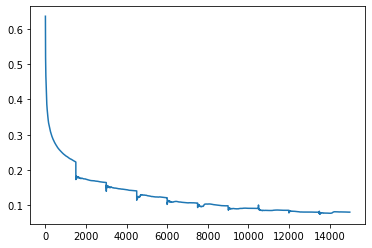

In [5]:
import matplotlib.pyplot as plt
plt.plot(loss_trains)

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

path_test = './data/test'
test_dataset = TestDataset(path_test,transform=transform)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle = False)

In [59]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

unet = UNet().to(device)
save_path = "./unet_result.pth"
unet.load_state_dict(torch.load(save_path))

unet.eval()
unet.to(device)

test_img = []
test_mask = []
cnt = 0

with torch.no_grad():
    for i, input_test in enumerate(test_loader, 0):

        input_test = input_test.to(device).float()

        pred_test = unet(input_test)
        
        pred_test[pred_test >= 0.5] = 1
        pred_test[pred_test < 0.5] = 0
        
        input_test = input_test.cpu()
        pred_test = pred_test.cpu()
        trans = transforms.ToPILImage()
        
        image_input = trans(input_test[0][0])
        image_pred = trans(pred_test[0][0])
        image_pred.save(os.path.join(path_test,str(cnt)+'_pred.jpg'))
        
        test_img.append(image_input)
        test_mask.append(image_pred)
        cnt += 1
        
print('Finish')

Finish


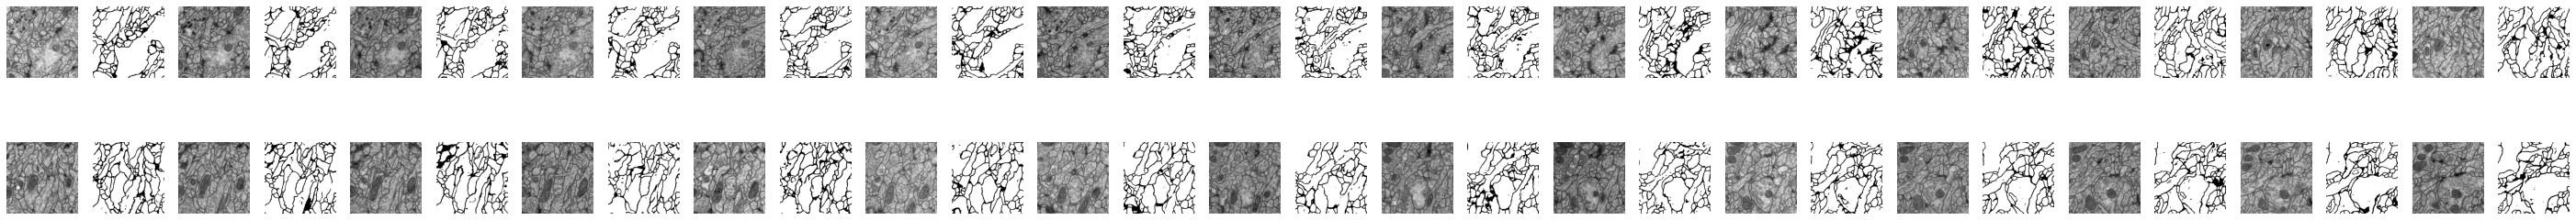

In [60]:
plt.figure(figsize=[50,5])
cnt = 0
for col in range(30):
    for row in range(2):
        cnt += 1
        if row == 0:
            plt.subplot(2,30,cnt)
            plt.imshow(test_img[col],'gray')
        else:
            plt.subplot(2,30,cnt)
            plt.imshow(test_mask[col],'gray')
        plt.axis('off')

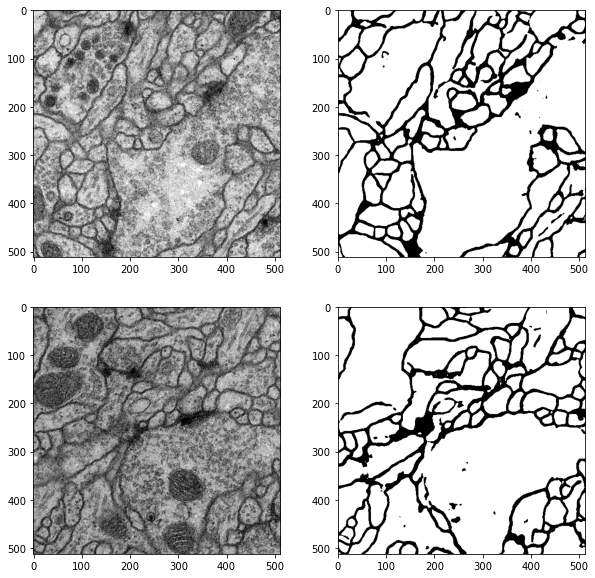

In [62]:
plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
plt.imshow(test_img[0],'gray')
plt.subplot(2,2,2)
plt.imshow(test_mask[0],'gray')
plt.subplot(2,2,3)
plt.imshow(test_img[-1],'gray')
plt.subplot(2,2,4)
plt.imshow(test_mask[-1],'gray')